In [1]:
#import stumpy
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
#df1_Final.head(5)
#df2_Final.head(5)
#df3_Final.head(5)

In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-01':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
#data6.tail(5)

In [5]:
##### Creamos tablas con cada uno de los principales trayectos
lista_periodos=[1,2,3,4,5,6]    
dict_dias={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
        
for periodo in lista_periodos:        
    cont=0
    globals()[f"d{periodo}"] = globals()[f"data{periodo}"].reset_index()                                
    globals()[f"df_{periodo}"] = pd.DataFrame(data=globals()[f"d{periodo}"], columns=['ds',listaDst[1],'Hora','Fecha','WeekNo','ID_Dia'])
    globals()[f"df_{periodo}"].set_index([listaDst[1]], inplace = True) 
    
    for dia in dict_dias:        
        globals()[f"df_{dict_dias[dia]}_{periodo}"] = globals()[f"df_{periodo}"].loc[globals()[f"df_{periodo}"].loc[:,'ID_Dia'] == cont]  # Seleccionamos solo los datos del lunes o solo los datos del martes para crear nuevas tablas dependiendo del día        
        globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = pd.DataFrame({})  #Creamos un nuevo dataframe vacio
        globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
        
        #Seleccionamos celdas del dataframe para generar las fechas que se requieren graficar
        start = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].iloc[0]['Fecha'] #Primera celda de la columna fecha
        period_start = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].iloc[0]['WeekNo']
        period_end = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].at[globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].index[-1],'WeekNo']  #última celda de columna WeekNo
        
        #Condición de error en period_start/period_end
        if (type(period_start) == pd.core.series.Series) | (type(period_end) == pd.core.series.Series):    
            lista = list(period_end)
            period_end = lista[-1]        
        
        periods = list(range(period_start, period_end+1))

        #Obtenemos las fechas de cada día 
        date_generated = pd.date_range(start, periods=len(periods), freq='7D')
        
        #Creamos una tabla para cada fecha de cada lunes o de cada martes..
        cont2=1        
        for date in date_generated:            
            globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}_{cont2}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].loc[globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].loc[:,'Fecha'] == date]
            cont2=cont2+1
        cont=cont+1
    

/tmp/ipykernel_11740/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/tmp/ipykernel_11740/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filt

/tmp/ipykernel_11740/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/tmp/ipykernel_11740/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filt

# Periodo 1 - Lunes

In [6]:
period1 = filtrado_Data_Monday_3
period2 = filtrado_Data_Monday_4
period3 = filtrado_Data_Monday_5
period4 = filtrado_Data_Monday_6
desescalada = pd.concat([period1,period2,period3,period4])
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-08-31')
mask = (desescalada['Fecha'] >= start_date) & (desescalada['Fecha'] <= end_date)
desescalada = desescalada.loc[mask]
desescalada = desescalada.reset_index()
desescalada = desescalada.set_index(["ds"])
#desescalada.tail(50)

/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


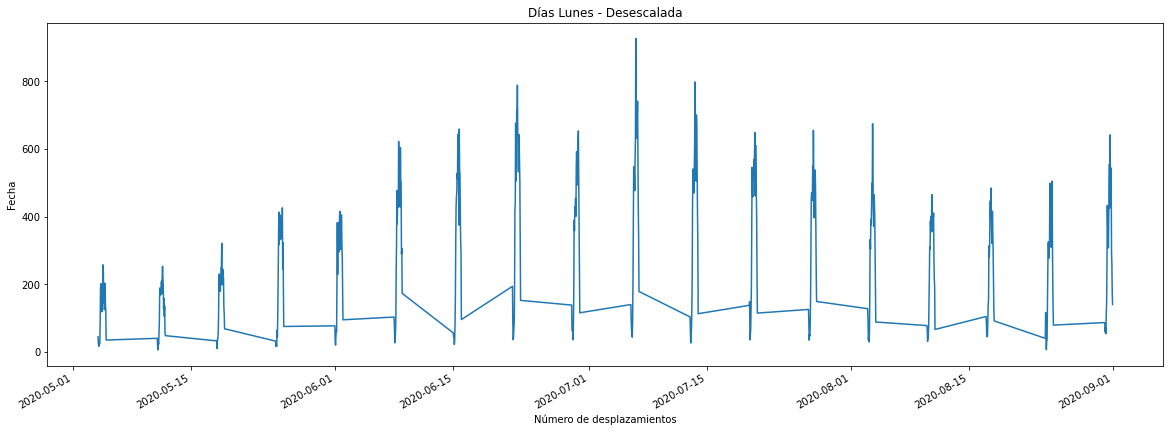

In [7]:
desescalada[desescalada.columns[0]].plot(figsize=(20,7), legend=None, title='Días Lunes - Desescalada')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()


# Patrón Trayecto - Día - Hora

In [8]:
filtrar_Hora = desescalada.loc[desescalada.loc[:,'Hora'] == 8]
filtrar_Hora.head()

,2807905-2807901,Hora,Fecha,WeekNo,ID_Dia
ds,,,,,
2020-05-04 08:00:00,201.729,8,2020-05-04,19,0
2020-05-11 08:00:00,180.508,8,2020-05-11,20,0
2020-05-18 08:00:00,230.382,8,2020-05-18,21,0
2020-05-25 08:00:00,304.809,8,2020-05-25,22,0
2020-06-01 08:00:00,228.754,8,2020-06-01,23,0


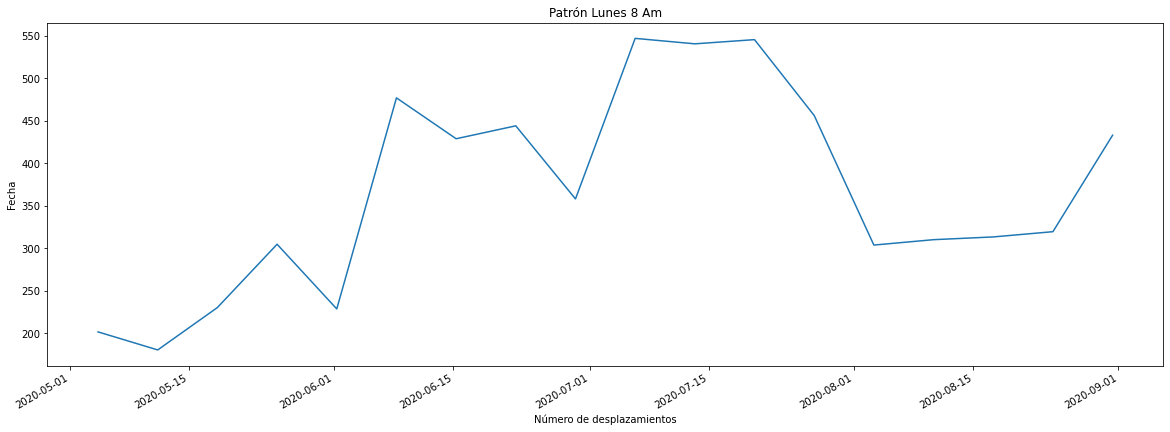

In [9]:
filtrar_Hora[filtrar_Hora.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 8 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Periodo 1 - Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [10]:
Periodo1 = pd.concat([data3,data4,data5,data6])
Periodo1 = Periodo1.drop(columns=['Fecha','Año','Mes','ID_Dia','Hora','WeekNo'])
Periodo1 = Periodo1.reset_index()
Periodo1 = Periodo1.rename(columns={'2807905-2807901':'y'})
Periodo1.tail()

,ds,y
2947,2020-08-31 19:00:00,509.100
2948,2020-08-31 20:00:00,293.615
2949,2020-08-31 21:00:00,256.641
2950,2020-08-31 22:00:00,172.866
2951,2020-08-31 23:00:00,140.111


# PROPHET
## Definimos datos de entrenamiento y datos de prueba

In [11]:
X = Periodo1.y
Y = Periodo1.ds
size = int(len(X) * 0.9)
train_X, test_X = X[0:size], X[size:len(X)]
train_Y, test_Y = Y[0:size], Y[size:len(Y)]
    
Train = pd.concat([train_Y,train_X], axis=1)
Test = pd.concat([test_Y,test_X], axis=1)

In [12]:
Test.head()

,ds,y
2656,2020-08-19 16:00:00,447.718
2657,2020-08-19 17:00:00,492.218
2658,2020-08-19 18:00:00,356.899
2659,2020-08-19 19:00:00,391.765
2660,2020-08-19 20:00:00,303.351


## Hacemos ciclo for para predecir el día siguiente uno tras otro
## La predicción se demora 24 minutos

In [13]:
predictions = list()

# Se crea una función de predicción continua
def rolling_forecast():   
    history = Train.copy()
    
    for t in range(len(test_X)):
        m = Prophet()
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo
        future = m.make_future_dataframe(periods=1, freq='H')   
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]         
        predictions.append(yhat)
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        obs = pd.DataFrame(Test[['ds','y']].iloc[t]) #t inicia en 0 hasta la longitud de test_x          
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0)
        
        
        print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))

rolling_forecast()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.1139
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4973.28    0.00230972       87.5676      0.2909           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       4973.45   0.000368681       125.493   6.184e-06       0.001      173  LS failed, Hessian reset 
     156       4973.67   0.000175658       90.0061   1.297e-06       0.001      285  LS failed, Hessian reset 
     199       4973.73    0.00107646       54.2556           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       4973.74   1.33179e-05       53.2249   2.304e-07       0.001      434  LS failed, Hessian reset 
     239       4973.74   9.18409e-09        48.559     0.01276      0.9787      452   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=377.422351, expected=447.718000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -59.0999
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4975.47    0.00286439       71.3204           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       4975.66   0.000626668       187.957   7.156e-06       0.001      187  LS failed, Hessian reset 
     138       4975.84   1.01825e-05        40.066   1.865e-07       0.001      268  LS failed, Hessian reset 
     153       4975.84   1.94037e-07       50.0178      0.1151       0.506      293   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=380.183890, expected=492.218000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -59.7665
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90       4977.08   0.000123659       53.5313   1.209e-06       0.001      163  LS failed, Hessian reset 
      99       4977.17   3.42229e-05       46.3179      0.1908      0.1908      176   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       4977.28   0.000152496       63.8201   1.074e-06       0.001      239  LS failed, Hessian reset 
     167       4977.41   0.000315759       129.286   3.095e-06       0.001      356  LS failed, Hessian reset 
     193       4977.45    8.1324e-05       55.7647   1.226e-06       0.001      433  LS failed, Hessian reset 
     199       4977.46   1.76308e-05       53.6731      0.3171           1      441   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       4977.46   6.28602e-07       55.8992           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=404.677543, expected=356.899000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.2603
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4979.6   0.000595778       58.7917      0.9102      0.9102      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       4979.72   1.17166e-05       53.3058   2.435e-07       0.001      202  LS failed, Hessian reset 
     139       4979.72   1.70891e-05       55.7642   2.903e-07       0.001      265  LS failed, Hessian reset 
     150       4979.72   3.67276e-07       50.0053      0.3246      0.3246      283   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=416.822910, expected=391.765000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.7998
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      82       4981.75   0.000538181        157.75   5.227e-06       0.001      144  LS failed, Hessian reset 
      99        4981.9    8.4265e-05       51.3936           1           1      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122          4982   0.000479368       129.964   5.563e-06       0.001      239  LS failed, Hessian reset 
     145       4982.04   8.63474e-05       62.1249   1.584e-06       0.001      307  LS failed, Hessian reset 
     159       4982.05   2.09474e-05        51.368   3.362e-07       0.001      366  LS failed, Hessian reset 
     172       4982.05    1.1896e-07       45.0063       0.208           1      388   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=384.912168, expected=303.351000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.2073
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      51       4982.66   0.000940218       93.6255   1.765e-05       0.001      109  LS failed, Hessian reset 
      89       4983.67   0.000260813       124.903   3.489e-06       0.001      205  LS failed, Hessian reset 
      99       4983.75   8.80668e-05       53.9762       0.135           1      220   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       4983.96   0.000185666        70.274   3.121e-06       0.001      286  LS failed, Hessian reset 
     199       4984.13    2.4309e-05       56.3392           1           1      394   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       4984.13   1.08476e-05        45.803   2.026e-07       0.001      429  LS failed, Hessian reset 
     211       4984.13   2.04161e-07         45.86      0.4253   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=303.387086, expected=234.325000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.6514
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4985.67    0.00013452       60.1858       0.238      0.9952      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       4986.11   0.000508698       146.871   5.129e-06       0.001      209  LS failed, Hessian reset 
     175       4986.25   6.44366e-08       45.7304     0.03991           1      270   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=204.305679, expected=193.813000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -89.3649
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      83       4987.47   0.000147711       65.9649   1.244e-06       0.001      161  LS failed, Hessian reset 
      99       4987.78     0.0024237       69.0854       0.224           1      187   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       4987.79     0.0001588       68.8386    2.39e-06       0.001      228  LS failed, Hessian reset 
     138       4988.46   0.000756117       158.781   8.679e-06       0.001      309  LS failed, Hessian reset 
     195       4988.67   7.28154e-05       76.1521   1.065e-06       0.001      440  LS failed, Hessian reset 
     199       4988.68   5.08572e-05       53.9971           1           1      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       4988.68   4.09056e-07       42.3555      0.1923   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=129.413477, expected=106.866000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -113.012
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4990.02   0.000969077       61.5851      0.2601           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       4991.05   0.000167053       87.8966   2.832e-06       0.001      223  LS failed, Hessian reset 
     167       4991.09   8.66372e-05       52.9325   1.149e-06       0.001      313  LS failed, Hessian reset 
     189       4991.09   1.19263e-06       58.4315           1           1      343   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=93.242124, expected=98.351000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -115.702
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      61       4991.52     0.0011473       130.472   1.914e-05       0.001      130  LS failed, Hessian reset 
      85       4992.11   0.000179585       73.6235   1.171e-06       0.001      209  LS failed, Hessian reset 
      99       4992.36   0.000683596       86.5177       0.464       0.464      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       4993.27   0.000163891       83.6408   1.572e-06       0.001      326  LS failed, Hessian reset 
     166       4993.43   0.000175443       101.401   1.956e-06       0.001      409  LS failed, Hessian reset 
     199       4993.44   6.51782e-07       53.7604      0.8421      0.8421      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       4993.44   1.49174e-07       61.5734     0.05651   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=78.381888, expected=35.206000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -137.598
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4994.42   0.000330692       70.1153      0.6787      0.6787      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       4995.34   0.000256463       75.6372   1.035e-06       0.001      200  LS failed, Hessian reset 
     171       4995.77   0.000162564       90.3868   2.099e-06       0.001      301  LS failed, Hessian reset 
     193       4995.78    3.4876e-07       60.9327     0.05338      0.2987      335   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=59.020287, expected=34.291000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -137.946
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       4995.45   0.000448888       148.115   1.055e-06       0.001      128  LS failed, Hessian reset 
      99       4996.88    0.00243442       349.378      0.4769      0.4769      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4998.06   9.69481e-05       67.1672           1           1      275   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       4998.17    2.0152e-05       54.3776   3.661e-07       0.001      371  LS failed, Hessian reset 
     299       4998.24    0.00036932       52.7207      0.7549      0.7549      441   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       4998.25   1.18805e-05        58.044   2.277e-07       0.001      546  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=34.189638, expected=42.368000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -134.947
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      68       4997.96   0.000393408       156.803   1.147e-06       0.001      115  LS failed, Hessian reset 
      99       4999.25    0.00106802       90.3803           1           1      151   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5000.55   0.000394227       60.7203      0.9271      0.9271      276   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       5000.63   0.000204213       53.9458   4.086e-06       0.001      378  LS failed, Hessian reset 
     299        5000.7   2.91781e-05       59.3916           1           1      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     354       5000.72   2.28518e-07       51.9164      0.2261           1      585   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=26.489954, expected=30.192000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -139.501
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      66       4999.84   0.000228713       123.176   2.041e-06       0.001      122  LS failed, Hessian reset 
      99       5001.65    0.00146346       68.0664           1           1      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5002.84   0.000452334       52.4335           1           1      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     250       5002.96   8.01962e-05       47.2647   1.456e-06       0.001      429  LS failed, Hessian reset 
     299       5003.02    2.5326e-05       74.0966           1           1      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301       5003.02   1.62207e-05       44.1483   2.197e-07       0.001      556  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=59.959279, expected=30.377000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -139.436
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      73       5002.55   0.000419332       200.029   1.521e-06       0.001      118  LS failed, Hessian reset 
      99       5003.74     0.0169138       217.725       9.158      0.9158      150   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       5003.81   0.000115958       52.6024   1.194e-06       0.001      204  LS failed, Hessian reset 
     155       5004.96   0.000172892        85.725   2.946e-06       0.001      330  LS failed, Hessian reset 
     179       5005.17     5.446e-05       43.5506   7.993e-07       0.001      403  LS failed, Hessian reset 
     199       5005.17   1.03764e-06       45.1188      0.4643      0.4643      441   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       5005.17   5.08562e-07       51.4222      0.3371   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=135.806038, expected=168.007000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -95.8499
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81        5006.1    0.00012142       66.4826   1.742e-06       0.001      145  LS failed, Hessian reset 
      99       5006.29   0.000421283       90.9714           1           1      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       5007.23   0.000214467       71.7194    1.03e-06       0.001      251  LS failed, Hessian reset 
     156       5007.31    7.6132e-05       60.7358   1.435e-06       0.001      318  LS failed, Hessian reset 
     199       5007.38   3.16822e-06       60.2541     0.01593           1      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     289       5007.42   5.90528e-06       54.2728   9.242e-08       0.001      537  LS failed, Hessian reset 
     293       5007.42   2.05032e-07       48.1536      0.1668   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=219.103245, expected=219.592000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -83.9181
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5008.79    0.00327845       55.2727           1           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       5009.45    0.00100149       183.831   9.489e-06       0.001      238  LS failed, Hessian reset 
     185       5009.66    5.0638e-05       52.8901   1.213e-06       0.001      381  LS failed, Hessian reset 
     199       5009.66   1.55811e-06       44.5916      0.5844      0.5844      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       5009.66   5.20225e-07        48.638      0.3822      0.3822      418   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=277.640856, expected=277.609000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -73.358
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       5011.35    0.00018029       103.086   2.119e-06       0.001      179  LS failed, Hessian reset 
      99       5011.43     0.0010284       70.0288           1           1      183   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       5011.77    0.00020541       103.792    1.81e-06       0.001      292  LS failed, Hessian reset 
     170       5011.89   0.000139782        91.811   2.303e-06       0.001      356  LS failed, Hessian reset 
     190        5011.9   7.35659e-07       46.3436   1.501e-08       0.001      423  LS failed, Hessian reset 
     191        5011.9   3.62922e-07       48.9054      0.3497           1      425   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=299.062969, expected=368.209000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.9121
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5013.76    0.00106895       44.3947           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111        5013.9   0.000297431       97.4399   4.767e-06       0.001      173  LS failed, Hessian reset 
     149       5013.93   2.55797e-07       51.7036      0.3929           1      232   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=308.917027, expected=313.153000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.4052
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      85       5015.65   0.000143022       78.0478   2.565e-06       0.001      163  LS failed, Hessian reset 
      99       5015.72   0.000668434       73.7347           1           1      180   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105        5015.9    0.00108123       154.172   1.195e-05       0.001      229  LS failed, Hessian reset 
     188       5016.25   0.000181212       132.581   2.189e-06       0.001      415  LS failed, Hessian reset 
     199       5016.32   0.000145537          75.4      0.8633      0.8633      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       5016.35   2.62854e-05       52.9761   4.912e-07       0.001      494  LS failed, Hessian reset 
     237       5016.35   1.43309e-07       60.7606      0.4043   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=331.032906, expected=390.574000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -61.4857
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       5018.08     0.0003896       143.341   3.443e-06       0.001      166  LS failed, Hessian reset 
      99       5018.12   0.000434205       86.3244           1           1      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     184       5018.44   1.66908e-05       38.6472    2.04e-07       0.001      330  LS failed, Hessian reset 
     197       5018.45   4.14277e-07       45.0934      0.8814      0.8814      352   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=374.828900, expected=426.591000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.1043
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5020.39   0.000143664       58.7615      0.3716      0.3716      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       5020.51   9.81349e-05       60.2364   1.667e-06       0.001      209  LS failed, Hessian reset 
     145       5020.59    3.8236e-06       48.1347   8.553e-08       0.001      296  LS failed, Hessian reset 
     150       5020.59   4.68825e-07       41.3022      0.7557      0.2379      304   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=414.196408, expected=478.170000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.1471
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5022.27   0.000585382       67.3911       3.839      0.3839      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       5022.43   0.000333466        146.09   3.652e-06       0.001      181  LS failed, Hessian reset 
     158       5022.57   4.40279e-08       42.7092      0.0136      0.8666      241   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=424.219745, expected=398.903000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -61.0862
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      83       5024.86    0.00027174       78.0758   1.007e-06       0.001      157  LS failed, Hessian reset 
      99       5025.02   0.000900217        55.282      0.1851           1      178   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100       5025.02   5.59396e-05       48.2509   1.012e-06       0.001      221  LS failed, Hessian reset 
     144       5025.07   0.000277636       84.0112   4.345e-06       0.001      317  LS failed, Hessian reset 
     199       5025.09   5.10478e-06       51.9599           1           1      397   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=403.934058, expected=425.530000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.1415
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      84       5027.08   0.000205513       77.3797   1.051e-06       0.001      155  LS failed, Hessian reset 
      99       5027.24    7.2591e-05       45.7936      0.1718           1      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       5027.24   3.60932e-06       46.6951    7.22e-08       0.001      226  LS failed, Hessian reset 
     127       5027.25   6.78081e-05       58.1041   1.087e-06       0.001      293  LS failed, Hessian reset 
     162       5027.29   0.000265958        60.141    3.98e-06       0.001      376  LS failed, Hessian reset 
     199       5027.31   0.000441263       71.4035       6.167      0.6167      435   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       5027.36   0.000146043       56.8224   2.914e-06   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=380.806582, expected=401.151000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.9954
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      60       5028.99   0.000272997       129.334   3.739e-06       0.001      118  LS failed, Hessian reset 
      99       5029.59   0.000465864       52.6963      0.6775      0.6775      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       5029.73   0.000481752       139.684   5.608e-06       0.001      261  LS failed, Hessian reset 
     179       5029.77   0.000333628       58.4854   4.933e-06       0.001      376  LS failed, Hessian reset 
     199       5029.79   2.27461e-05       54.8343           1           1      402   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       5029.79   2.13775e-05       46.5921   3.068e-07       0.001      445  LS failed, Hessian reset 
     225       5029.79   1.53967e-06       49.2137   3.297e-08   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=380.814361, expected=422.598000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.2236
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5031.81   0.000627459        54.511       1.834      0.5487      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     176       5031.99   0.000622354       141.282   7.489e-06       0.001      280  LS failed, Hessian reset 
     199       5032.02   7.88684e-06       61.2293      0.5646      0.5646      317   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       5032.02   2.91843e-05       61.6618    5.57e-07       0.001      377  LS failed, Hessian reset 
     233       5032.03   3.89278e-06       51.3206   7.571e-08       0.001      456  LS failed, Hessian reset 
     236       5032.03   1.50887e-07        45.998      0.1857      0.5969      461   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=403.127344, expected=368.820000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.9729
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5033.86    0.00110422       219.621   1.386e-05       0.001      156  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     174       5034.36   1.54596e-05       49.7417   2.528e-07       0.001      297  LS failed, Hessian reset 
     186       5034.36   2.55297e-07       53.3965      0.1979           1      315   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=413.554884, expected=510.106000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -61.3438
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5035.77   0.000147278       70.0763      0.3508      0.3508      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     197       5036.23   6.74564e-06        49.109   1.368e-07       0.001      280  LS failed, Hessian reset 
     199       5036.23   2.41365e-06       43.1441      0.7062      0.7062      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       5036.23   3.09704e-07       50.6865      0.6631      0.6631      304   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=382.176616, expected=343.808000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1789
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      68       5037.81    0.00028734       97.2613    4.54e-06       0.001      121  LS failed, Hessian reset 
      76       5037.84   0.000101562       50.7266   1.337e-06       0.001      172  LS failed, Hessian reset 
      99       5038.11    0.00204703       99.8903           1           1      205   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       5038.26   0.000181839       93.1278   2.083e-06       0.001      258  LS failed, Hessian reset 
     158       5038.45    0.00017544       76.7639   3.057e-06       0.001      382  LS failed, Hessian reset 
     199       5038.53   1.41367e-05       53.7316           1           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       5038.53   1.54886e-05       56.2172   2.753e-07   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=298.647431, expected=209.338000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -86.5905
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5039.7    0.00382135       98.5102           1           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       5040.43     0.0015955       81.9033   9.932e-06       0.001      215  LS failed, Hessian reset 
     188       5040.61   6.21989e-05       57.8659   1.278e-06       0.001      333  LS failed, Hessian reset 
     199       5040.61   1.14351e-05       61.5673           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       5040.61   1.41585e-07       45.7234     0.07577           1      369   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=199.147127, expected=148.256000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -101.728
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      85       5041.75   0.000239562       112.658   1.155e-06       0.001      158  LS failed, Hessian reset 
      99       5042.06   0.000308897       46.5502           1           1      177   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       5042.65    0.00250626       317.072   3.396e-05       0.001      271  LS failed, Hessian reset 
     199       5042.89   0.000168106       70.0822      0.1938           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       5042.89   8.45368e-05       52.6604   1.292e-06       0.001      401  LS failed, Hessian reset 
     236        5042.9   1.05589e-06         46.12   2.086e-08       0.001      501  LS failed, Hessian reset 
     238        5042.9   9.74853e-08       47.2673     0.05389   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -114.78
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5044.28   0.000150109       57.7687     0.07824     0.07824      142   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134          5045    0.00134021       180.214   1.903e-05       0.001      229  LS failed, Hessian reset 
     183       5045.28   0.000189225       114.635   2.072e-06       0.001      340  LS failed, Hessian reset 
     199       5045.29   3.39445e-06       47.4501      0.3517           1      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212        5045.3   2.99071e-06       51.3207   5.999e-08       0.001      431  LS failed, Hessian reset 
     222        5045.3   2.50275e-07        49.276      0.2647           1      443   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=85.078505, expected=125.294000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -108.312
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      85       5045.89   0.000156354       78.4593   2.065e-06       0.001      149  LS failed, Hessian reset 
      99       5046.06     0.0028047       96.2989           1           1      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172       5047.54   0.000379106       58.8364   6.213e-06       0.001      304  LS failed, Hessian reset 
     199       5047.56    1.1635e-06       71.4877     0.09565      0.3281      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       5047.57   4.78664e-06       55.7952   1.031e-07       0.001      454  LS failed, Hessian reset 
     264       5047.57   3.39633e-06       53.3081      0.3329           1      508   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=69.146368, expected=77.032000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -123.653
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      61        5047.1   0.000310416       148.707   1.595e-06       0.001      130  LS failed, Hessian reset 
      69       5047.87   0.000300087        140.11   2.485e-06       0.001      176  LS failed, Hessian reset 
      99       5048.75    0.00670447        110.84           1           1      217   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       5049.84      0.000199       105.212   2.689e-06       0.001      285  LS failed, Hessian reset 
     178       5049.96   0.000286928        119.75   3.223e-06       0.001      400  LS failed, Hessian reset 
     199          5050   0.000177434       58.7926      0.6188      0.6188      430   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5050.01   2.06616e-06       56.9307   3.771e-08   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=49.990514, expected=60.237000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -129.489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5051.1     0.0012325       101.222           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       5051.99   0.000146371       65.2369   1.175e-06       0.001      192  LS failed, Hessian reset 
     152       5052.38   6.98002e-05       43.0794   1.452e-06       0.001      280  LS failed, Hessian reset 
     168       5052.38    7.5803e-08       61.5874     0.09295           1      305   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
predicted=24.682060, expected=29.376000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -140.866
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5053.25     0.0144961       125.024           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     176       5054.77   0.000174796       70.4191   3.089e-06       0.001      254  LS failed, Hessian reset 
     195       5054.77   1.80586e-07       44.9094      0.2947           1      291   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=15.973049, expected=30.193000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -140.559
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       5053.98   0.000492105       136.506   9.925e-07       0.001      133  LS failed, Hessian reset 
      99       5055.21    0.00891559       144.115           1           1      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       5056.01   0.000135812       62.3334   1.194e-06       0.001      221  LS failed, Hessian reset 
     156        5056.9   0.000713849       193.898    9.06e-06       0.001      313  LS failed, Hessian reset 
     165       5057.04   0.000125109       66.9037   1.791e-06       0.001      361  LS failed, Hessian reset 
     183       5057.08    0.00012798       73.2639   1.805e-06       0.001      438  LS failed, Hessian reset 
     199       5057.09   5.60232e-06       46.5885      0.9533      0.9533      460   
    Iter      log prob        ||dx||      ||gr

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=49.651526, expected=59.937000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -129.62
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5057.73    0.00152398       78.9857           1           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       5059.09   0.000164272       77.9904   1.216e-06       0.001      249  LS failed, Hessian reset 
     199        5059.5    0.00113404       80.4524           1           1      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       5059.51   9.56006e-05       54.0567   1.301e-06       0.001      343  LS failed, Hessian reset 
     226       5059.51   1.80111e-07       44.9812      0.3046           1      378   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=124.810445, expected=145.410000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -102.659
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      87       5059.76   0.000460099         103.4   9.665e-07       0.001      151  LS failed, Hessian reset 
      99       5060.26    0.00012508       59.2323       0.223       0.223      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     160        5061.5   0.000245075       88.4759   1.079e-06       0.001      297  LS failed, Hessian reset 
     199       5061.74   8.33879e-06       47.3627     0.04859           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       5061.74   6.29011e-07       54.2116      0.2426           1      378   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=208.994389, expected=201.195000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.6492
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       5063.15    0.00161515        74.691   2.431e-05       0.001      168  LS failed, Hessian reset 
      99       5063.19   0.000365687       61.9747           1           1      172   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       5063.47   0.000311088       90.1158   6.296e-06       0.001      264  LS failed, Hessian reset 
     177        5063.8    0.00201856       189.426   2.479e-05       0.001      356  LS failed, Hessian reset 
     199       5064.05   5.61333e-06       55.9621      0.2544           1      388   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       5064.05   3.75363e-07       44.1875      0.2871           1      406   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=265.965925, expected=299.545000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.8226
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      74       5065.34    0.00015228       77.5795   1.609e-06       0.001      139  LS failed, Hessian reset 
      99       5065.63    0.00142179       56.2587       1.254      0.1254      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       5065.73   0.000180498       95.6202    1.56e-06       0.001      242  LS failed, Hessian reset 
     155       5066.03    0.00037153       146.389   4.166e-06       0.001      356  LS failed, Hessian reset 
     199       5066.24   3.22499e-06       44.7125           1           1      421   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       5066.24   2.16511e-05       46.5264    3.92e-07       0.001      482  LS failed, Hessian reset 
     230       5066.24   1.23191e-06       48.4247      0.4437   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=287.802506, expected=235.375000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -81.4884
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      69       5066.97   0.000186327       90.3791   1.301e-06       0.001      133  LS failed, Hessian reset 
      91        5067.5   0.000487331       192.652   5.794e-06       0.001      193  LS failed, Hessian reset 
      99       5067.64     0.0013022        40.449           1           1      201   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       5067.67   0.000315989       110.797   5.729e-06       0.001      246  LS failed, Hessian reset 
     163       5068.21   0.000468862       193.387   3.916e-06       0.001      374  LS failed, Hessian reset 
     199       5068.54   2.06726e-05       46.9041      0.7103      0.7103      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       5068.54   6.73896e-07       53.2014   1.418e-08   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=295.919229, expected=283.292000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -73.1988
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       5069.91   0.000189409       104.475   1.772e-06       0.001      144  LS failed, Hessian reset 
      99        5070.2   0.000241724        73.872      0.8092      0.8092      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       5070.64   0.000729994       221.805    7.56e-06       0.001      310  LS failed, Hessian reset 
     199       5070.85   3.23033e-05       57.6933           1           1      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       5070.85   5.43563e-08       47.1307     0.01153           1      420   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=318.119596, expected=337.505000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.3301
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5072.56   0.000281719       76.9796      0.2191      0.2191      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       5072.65   0.000451684       114.956   6.294e-06       0.001      176  LS failed, Hessian reset 
     172       5073.01   0.000945679       183.199   1.553e-05       0.001      350  LS failed, Hessian reset 
     199       5073.13   1.81847e-05       57.0282           1           1      384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       5073.15   3.46402e-06        46.121   8.329e-08       0.001      515  LS failed, Hessian reset 
     276       5073.15   3.05291e-06       42.4643   6.725e-08       0.001      575  LS failed, Hessian reset 
     282       5073.15   4.93779e-07        44.448      0.2671   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=360.942867, expected=332.286000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.8899
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      83       5074.83   0.000118644       53.4495   2.234e-06       0.001      160  LS failed, Hessian reset 
      99       5074.84   0.000148996       61.1601           1           1      185   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       5075.07    0.00019687       106.734   2.564e-06       0.001      241  LS failed, Hessian reset 
     148       5075.19   0.000146631       101.161   2.045e-06       0.001      331  LS failed, Hessian reset 
     199       5075.26    0.00512689       71.4509           1           1      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       5075.33    0.00126057        204.78   2.249e-05       0.001      437  LS failed, Hessian reset 
     245       5075.46   6.93492e-05        83.271   8.193e-07   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=398.849504, expected=318.002000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.5278
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5076.98    0.00175597       57.2586           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       5077.33   0.000226047       90.7813    1.04e-06       0.001      259  LS failed, Hessian reset 
     184       5077.46   1.32345e-05       49.1024   3.133e-07       0.001      328  LS failed, Hessian reset 
     199       5077.46   2.69117e-05       75.5274      0.2521           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       5077.46   1.17217e-05       54.0808   1.552e-07       0.001      394  LS failed, Hessian reset 
     212       5077.46   4.26231e-07       48.7917           1           1      409   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=407.635974, expected=459.266000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.6254
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5079.38    0.00404202       114.659           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       5079.41   0.000206066       112.003   2.901e-06       0.001      177  LS failed, Hessian reset 
     153       5079.52   3.03617e-06       50.6917   5.877e-08       0.001      295  LS failed, Hessian reset 
     158       5079.52   4.30286e-08       57.3436     0.03674      0.6231      303   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=386.719608, expected=365.085000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.9011
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5081.69   0.000715491       94.5525   1.228e-05       0.001      188  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       5081.79   0.000107353       60.9558   1.281e-06       0.001      243  LS failed, Hessian reset 
     157       5081.92   0.000226193       71.0551   3.468e-06       0.001      377  LS failed, Hessian reset 
     199       5081.99   1.22289e-06       56.6675       0.338           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       5081.99   5.81687e-07        51.689        1.31       0.131      442   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=362.570223, expected=421.433000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.976
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       5083.89    0.00111802       141.337   1.603e-05       0.001      151  LS failed, Hessian reset 
      99       5083.93   0.000659286       78.7861      0.5182           1      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       5084.06    0.00011923       51.4847   2.067e-06       0.001      240  LS failed, Hessian reset 
     153       5084.08   9.74226e-05       66.8361   1.187e-06       0.001      312  LS failed, Hessian reset 
     188       5084.08    1.5433e-07       52.4968     0.05132           1      364   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=362.313478, expected=344.749000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.6963
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5086.07    0.00523291       121.083           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       5086.14   0.000168731       84.9147   1.398e-06       0.001      171  LS failed, Hessian reset 
     124       5086.32   4.21932e-05       46.0382   8.308e-07       0.001      245  LS failed, Hessian reset 
     172       5086.41   0.000270695        143.44   2.733e-06       0.001      349  LS failed, Hessian reset 
     199       5086.55   3.90302e-05       48.3421      0.5552      0.5552      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       5086.56   9.72911e-09       57.5259    0.001316           1      417   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=382.551948, expected=383.991000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.6231
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5088.43    0.00137147       79.4434      0.9649      0.9649      142   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       5088.62   0.000164691       78.5729   1.221e-06       0.001      199  LS failed, Hessian reset 
     170       5088.83   8.94925e-05       45.5451   1.317e-06       0.001      336  LS failed, Hessian reset 
     199       5088.89   9.50615e-07       42.4716   1.803e-08       0.001      424  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       5088.89   5.33759e-07       44.7253           1           1      425   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=392.300510, expected=453.450000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.6036
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5090.58    0.00026847        75.506      0.2493      0.2493      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       5090.82   0.000982265       236.881   1.199e-05       0.001      218  LS failed, Hessian reset 
     177       5090.92   5.88599e-05       49.2315   1.007e-06       0.001      315  LS failed, Hessian reset 
     199       5090.92   3.74842e-05       64.8498           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       5090.93   6.17307e-07       46.6157      0.0403           1      362   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=356.972721, expected=338.864000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.3255
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5092.95    0.00160454       65.5399           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       5093.03   0.000148038       77.1376   1.213e-06       0.001      186  LS failed, Hessian reset 
     152       5093.31    0.00142405       203.277   1.838e-05       0.001      311  LS failed, Hessian reset 
     191       5093.46    6.8889e-06        40.731   1.261e-07       0.001      406  LS failed, Hessian reset 
     196       5093.46   8.38088e-08       53.0723      0.1486      0.1486      418   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=272.348695, expected=309.323000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.7571
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5095.1    0.00154982       119.078           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       5095.31   0.000141448       77.0236   1.578e-06       0.001      192  LS failed, Hessian reset 
     170       5095.59   0.000222146       129.234   2.126e-06       0.001      318  LS failed, Hessian reset 
     199       5095.82   1.24849e-05       52.2268       1.408           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       5095.82   1.83611e-05       57.8712   3.438e-07       0.001      428  LS failed, Hessian reset 
     238       5095.82   2.61091e-06       46.9655   4.896e-08       0.001      511  LS failed, Hessian reset 
     256       5095.82   1.66393e-07       45.4008     0.05567   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=172.274836, expected=182.878000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -93.4112
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      72       5096.39   0.000257334       85.8782   1.033e-06       0.001      134  LS failed, Hessian reset 
      99       5097.24   0.000305308       88.0548       0.042       0.042      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     195        5098.4   1.82386e-06       45.1195   2.693e-08       0.001      351  LS failed, Hessian reset 
     199        5098.4   1.00383e-06       42.7452           1           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204        5098.4   1.36696e-07       49.6594      0.1824           1      362   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=94.323690, expected=121.623000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -110.124
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      30       5094.69     0.0013118        123.79   1.773e-05       0.001       80  LS failed, Hessian reset 
      99       5099.14   0.000553333        70.877           1           1      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5100.6      0.010976       72.9364           1           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       5100.66    0.00011025       74.0675   1.611e-06       0.001      346  LS failed, Hessian reset 
     239       5100.77   6.14176e-05        41.732   9.097e-07       0.001      443  LS failed, Hessian reset 
     259       5100.77   2.23951e-07       47.0642      0.2341           1      477   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=54.131870, expected=114.174000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -112.401
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5101.78   0.000273819       71.3242      0.2993      0.2993      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128        5102.5   0.000192769       111.426    1.91e-06       0.001      205  LS failed, Hessian reset 
     175       5102.99   0.000103911       51.3935    2.48e-06       0.001      303  LS failed, Hessian reset 
     190          5103   8.46506e-06       51.7859    1.35e-07       0.001      364  LS failed, Hessian reset 
     193          5103   5.42396e-08       39.7564     0.05051      0.6477      369   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=35.595716, expected=84.302000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -121.998
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      72        5103.2   0.000147334       77.7177   1.407e-06       0.001      151  LS failed, Hessian reset 
      99       5103.92    0.00783625       257.765           1           1      180   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       5105.16   0.000248027       123.546   3.998e-06       0.001      305  LS failed, Hessian reset 
     188       5105.24   2.82927e-05       45.4376   4.188e-07       0.001      396  LS failed, Hessian reset 
     199       5105.24   3.79699e-06       54.9562      0.7366      0.7366      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       5105.24   3.98233e-07       46.6545      0.8387     0.08387      427   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=13.783503, expected=37.772000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -138.557
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5105.38    0.00030181       74.9699      0.4502      0.4502      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       5107.43   0.000174233       93.8056   2.242e-06       0.001      269  LS failed, Hessian reset 
     180       5107.55   0.000192017       80.6718   3.671e-06       0.001      323  LS failed, Hessian reset 
     199       5107.58   1.56357e-06       44.8883      0.8822      0.1356      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       5107.58   2.95621e-07       50.7476   6.586e-09       0.001      404  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-15.081289, expected=28.528000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -142.084
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      59       5104.68   0.000159658        85.246   1.956e-06       0.001      107  LS failed, Hessian reset 
      99        5108.3    0.00633587       49.7217           1           1      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       5109.63   0.000179846       73.4563   1.056e-06       0.001      289  LS failed, Hessian reset 
     199        5109.9   5.28025e-05        54.477      0.6538      0.6538      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       5109.91   2.55457e-08       45.1542      0.0402      0.5059      425   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-26.842512, expected=12.454000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -148.397
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5110.93    0.00135596       73.5279      0.1542      0.9144      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     156       5111.94   0.000204641       101.085   2.125e-06       0.001      259  LS failed, Hessian reset 
     189       5112.15   1.44679e-05       45.2115   3.095e-07       0.001      353  LS failed, Hessian reset 
     199       5112.15   1.08341e-06       51.8891      0.8239      0.8239      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     276       5112.17   1.75658e-07       52.6196      0.2353     0.05377      482   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=3.265230, expected=29.899000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -141.566
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5113.07     0.0010707       117.054      0.4148      0.4148      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       5114.38   0.000124563       61.1671   1.269e-06       0.001      230  LS failed, Hessian reset 
     194       5114.54    4.1565e-05       55.1043   7.285e-07       0.001      356  LS failed, Hessian reset 
     199       5114.54   2.69812e-05       50.7867      0.2577           1      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       5114.57   6.09197e-07       50.8861      0.1638      0.1638      443   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=74.916815, expected=72.975000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -125.896
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5115.29    0.00446514       85.7061      0.2766           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146       5116.58    0.00130807       165.248   1.819e-05       0.001      223  LS failed, Hessian reset 
     184       5116.79    7.9413e-06       47.9653   1.429e-07       0.001      314  LS failed, Hessian reset 
     199       5116.79    4.5386e-06       50.7136       0.224           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       5116.79    4.8488e-06       78.5605   9.652e-08       0.001      399  LS failed, Hessian reset 
     232       5116.79   3.59761e-07       51.4166       0.148           1      418   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -125.14
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5117.85    0.00234281       144.924           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179        5118.9   7.90389e-07       50.8217           1           1      248   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=206.477259, expected=130.411000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -107.671
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      85       5118.87   0.000153621       81.4223    1.63e-06       0.001      146  LS failed, Hessian reset 
      99       5119.35    0.00253354       130.489      0.1587           1      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     156       5120.64   0.000160063       79.9977   2.666e-06       0.001      278  LS failed, Hessian reset 
     199       5120.85   0.000322727       61.4441           1           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237       5120.91   1.31247e-05       47.9984   2.776e-07       0.001      420  LS failed, Hessian reset 
     255       5120.91   3.30788e-07       39.6193    0.009441           1      449   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=222.483578, expected=129.469000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -107.96
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      83       5120.54   0.000979032       248.736   8.348e-06       0.001      148  LS failed, Hessian reset 
      99       5121.14    0.00260473       70.9778           1           1      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5122.65   0.000106452       74.9361      0.3654           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       5122.76   1.74744e-07       48.0059      0.2494           1      389   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=226.543507, expected=212.467000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -86.889
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89       5123.92   0.000149949       99.1952   1.382e-06       0.001      171  LS failed, Hessian reset 
      99       5124.04   0.000299141       54.3651      0.2765           1      183   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       5124.09   0.000108701       46.3023   1.573e-06       0.001      240  LS failed, Hessian reset 
     158       5124.73   0.000262549        127.17   2.809e-06       0.001      336  LS failed, Hessian reset 
     189       5124.99   8.91803e-06       61.0213   1.677e-07       0.001      419  LS failed, Hessian reset 
     199       5124.99    4.2292e-07       58.2748      0.5144      0.5144      435   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       5124.99   1.43957e-05       40.8022   2.228e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=245.074792, expected=202.693000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -89.0608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5126.39   0.000781601       58.3134      0.9396      0.9396      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123        5127.1   0.000827026       232.754   1.195e-05       0.001      211  LS failed, Hessian reset 
     199       5127.31   0.000496864       48.4815           1           1      315   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       5127.32   9.41554e-07       41.5115      0.3314           1      364   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=282.810945, expected=258.271000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.9924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      80       5128.45   0.000198403       102.289   1.478e-06       0.001      148  LS failed, Hessian reset 
      99       5128.71    0.00143698       67.5645           1           1      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132        5129.2    0.00017473       76.9223   1.099e-06       0.001      308  LS failed, Hessian reset 
     166        5129.5   8.68678e-05       69.5235   9.806e-07       0.001      395  LS failed, Hessian reset 
     199       5129.53    0.00101119       69.2112           1           1      441   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274       5129.59   2.39129e-07       62.8461      0.1209      0.3659      552   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=316.939558, expected=196.836000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -90.4293
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5129.95   0.000532292       87.1262      0.6049      0.6049      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       5130.11   0.000189096       86.7256   1.116e-06       0.001      185  LS failed, Hessian reset 
     148       5130.92   0.000181755       96.1617   3.156e-06       0.001      315  LS failed, Hessian reset 
     199       5131.15   0.000401213       50.4247      0.2657      0.6746      395   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     242       5131.22   1.15939e-07       51.8235     0.04996      0.1776      460   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=320.722021, expected=338.762000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.9998
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5132.88   0.000157651       65.1504           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137        5133.1   0.000175896       92.1059    1.62e-06       0.001      227  LS failed, Hessian reset 
     169       5133.28   3.72714e-07       43.9108      0.3388           1      274   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=296.175709, expected=246.286000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.199
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       5134.82   0.000117899       49.8079   1.034e-06       0.001      155  LS failed, Hessian reset 
      99       5134.88    0.00188923       70.2345           1           1      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       5134.93   0.000132988       85.1375   2.023e-06       0.001      222  LS failed, Hessian reset 
     154       5135.51    0.00393061       343.046   6.224e-05       0.001      311  LS failed, Hessian reset 
     189       5135.69   7.36239e-06        61.468   1.615e-07       0.001      401  LS failed, Hessian reset 
     199       5135.69   7.30167e-07       44.9037      0.6447      0.6447      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       5135.69    2.7469e-06        55.396   4.441e-08    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=268.336774, expected=245.640000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.3355
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      88       5137.12   0.000252816       108.761   4.769e-06       0.001      154  LS failed, Hessian reset 
      99       5137.22   0.000260421        66.569      0.6933      0.6933      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       5137.75   0.000559104       187.482    6.41e-06       0.001      252  LS failed, Hessian reset 
     163       5138.02   7.19645e-05       62.1232   1.273e-06       0.001      341  LS failed, Hessian reset 
     185       5138.02   5.48362e-07       39.8406   9.226e-09       0.001      414  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=262.902561, expected=317.502000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.3817
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5139.58    0.00223478       132.209           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100       5139.59   0.000159239       85.5497   1.204e-06       0.001      166  LS failed, Hessian reset 
     162       5139.91   0.000167968       77.5926   1.143e-06       0.001      303  LS failed, Hessian reset 
     199       5140.11   1.44627e-06       45.4395        0.36        0.36      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       5140.11   1.51745e-08       79.2223    0.005045           1      376   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=281.639605, expected=312.174000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.0465
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71        5141.5   0.000286814       137.294   3.703e-06       0.001      138  LS failed, Hessian reset 
      97       5141.94   0.000502872       200.914   3.265e-06       0.001      206  LS failed, Hessian reset 
      99       5141.97   0.000200957       57.7588           1           1      208   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       5141.99   5.93389e-05       64.1232   9.864e-07       0.001      285  LS failed, Hessian reset 
     147          5142   8.59603e-08       50.8975     0.04619      0.2116      322   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=288.367960, expected=487.916000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.3533
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5141.83    0.00056009       46.6316      0.1902           1      142   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       5142.09   0.000457674       173.716   6.913e-06       0.001      202  LS failed, Hessian reset 
     156       5142.21   8.53692e-06       74.1151   1.708e-07       0.001      295  LS failed, Hessian reset 
     178       5142.22   1.00212e-07       52.6476     0.02163           1      332   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=251.545003, expected=341.866000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.7876
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      75       5143.48   0.000187366       97.0184       2e-06       0.001      130  LS failed, Hessian reset 
      99        5143.7   0.000565864       62.0204           1           1      164   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       5143.83    0.00132819       88.4602    1.45e-05       0.001      204  LS failed, Hessian reset 
     156       5144.12    0.00125303       132.147   1.349e-05       0.001      320  LS failed, Hessian reset 
     196       5144.31   3.05426e-05       47.3815    5.48e-07       0.001      412  LS failed, Hessian reset 
     199       5144.31   1.31717e-05       50.5162      0.5453      0.5453      418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       5144.31   6.09519e-07       41.8814      0.2296   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=165.835289, expected=345.923000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.4111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       5144.23   0.000212088       78.1729   1.037e-06       0.001      161  LS failed, Hessian reset 
      99       5144.41   0.000259702       58.3972           1           1      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       5144.44   3.13194e-05       53.7126   4.472e-07       0.001      260  LS failed, Hessian reset 
     179       5144.76   4.77281e-05       58.7655   8.312e-07       0.001      381  LS failed, Hessian reset 
     189       5144.76   6.79337e-05       67.3098   1.455e-06       0.001      427  LS failed, Hessian reset 
     199       5144.76   1.86737e-06       49.6711      0.7506      0.7506      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       5144.76   1.20473e-07       46.2452      0.2042   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=64.624976, expected=203.079000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -89.2446
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5144.95    0.00464515       187.235           1           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       5145.83    0.00016461       97.7515   1.405e-06       0.001      254  LS failed, Hessian reset 
     181       5146.25    0.00020754       124.717   2.195e-06       0.001      335  LS failed, Hessian reset 
     199       5146.26   1.14908e-05       59.5099           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       5146.26   5.61077e-06       64.3716   9.981e-08       0.001      425  LS failed, Hessian reset 
     238       5146.26   6.61554e-07       52.3894     0.03479           1      467   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-12.795388, expected=56.614000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -132.168
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5146.46    0.00800324       323.451           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164       5148.36   0.000636497       169.388   5.668e-06       0.001      270  LS failed, Hessian reset 
     199       5148.49    0.00147418       72.7096      0.2357           1      314   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       5148.57   5.24701e-07       64.3436      0.2387           1      389   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-53.921665, expected=160.018000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -99.8465
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5146.94   0.000318746       144.757      0.3976      0.3976      142   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       5147.83   0.000356785       146.207   2.836e-06       0.001      221  LS failed, Hessian reset 
     198       5148.06   7.82682e-09       52.5982    0.004762      0.3041      316   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-70.457715, expected=90.838000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -120.398
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5146.9   0.000403088       206.816      0.4059      0.4059      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       5148.87    0.00208283       109.865   2.561e-05       0.001      264  LS failed, Hessian reset 
     178       5148.96   5.98029e-05       49.3541   1.217e-06       0.001      329  LS failed, Hessian reset 
     199       5148.97    3.7181e-07       49.1117      0.6896      0.6896      360   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
predicted=-91.149102, expected=43.602000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -136.961
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5148.65    0.00289083       120.185      0.3858           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127        5149.4   0.000254252       121.389   1.275e-06       0.001      211  LS failed, Hessian reset 
     176        5150.1   0.000811331       172.347   6.996e-06       0.001      326  LS failed, Hessian reset 
     199       5150.28   9.62832e-05       59.3496      0.3306           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     277       5150.37   2.60111e-07       44.5798      0.2612      0.2612      468   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-117.540948, expected=27.312000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -143.15
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5150.03    0.00523338        193.31      0.6897      0.6897      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       5151.07   0.000118915       56.0299   1.336e-06       0.001      254  LS failed, Hessian reset 
     199       5151.52   9.14062e-07       55.0279      0.2366      0.9244      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       5151.52   1.02232e-07       52.4102     0.07792           1      348   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-126.435851, expected=29.983000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -142.124
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5150.75    0.00221396       130.629      0.4164      0.8653      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       5152.04   0.000166413       90.0145   2.137e-06       0.001      250  LS failed, Hessian reset 
     199       5152.38   4.75141e-05       48.9765           1           1      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       5152.39   8.45602e-05       67.1024   1.336e-06       0.001      354  LS failed, Hessian reset 
     262        5152.4   1.38604e-06       53.8777      0.4172      0.4172      424   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-93.976090, expected=42.114000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -137.533
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5151.52    0.00368284       174.877      0.1564      0.5812      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100       5151.54   0.000199647       90.2637   1.142e-06       0.001      156  LS failed, Hessian reset 
     158       5153.26   0.000328216       148.296   5.375e-06       0.001      266  LS failed, Hessian reset 
     199       5153.64    0.00433044       129.014           1           1      323   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       5153.71   6.03898e-05       54.2035   8.801e-07       0.001      414  LS failed, Hessian reset 
     254       5153.71   2.62775e-07        44.749       0.239           1      437   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-18.834175, expected=77.575000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -124.891
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       5153.04   0.000758031       263.172   4.768e-06       0.001      147  LS failed, Hessian reset 
      99       5153.87   0.000492512        84.951       0.652       0.652      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     160       5155.29   0.000214859        106.08   1.308e-06       0.001      276  LS failed, Hessian reset 
     199       5155.51   5.38909e-05       73.3079      0.3899           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     261       5155.52   4.41145e-08       56.4388     0.03567     0.03567      422   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=65.439843, expected=64.304000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -129.497
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      88       5155.17   0.000427421       218.102   1.662e-06       0.001      153  LS failed, Hessian reset 
      99       5156.04    0.00592592        265.72       5.823      0.5823      168   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       5156.23   0.000155647       83.4084   1.639e-06       0.001      204  LS failed, Hessian reset 
     128       5156.72   0.000212791       85.5603   1.068e-06       0.001      274  LS failed, Hessian reset 
     164       5156.91   0.000138849       71.6188   1.557e-06       0.001      368  LS failed, Hessian reset 
     199       5157.62    0.00120244       148.328     0.03772           1      418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     279       5157.97   1.42802e-07       51.1302      0.1687   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=121.990112, expected=81.353000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -123.632
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       5157.06   0.000345504       173.715   1.552e-06       0.001      154  LS failed, Hessian reset 
      99       5158.45    0.00193863       118.913      0.8304      0.8304      180   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167       5159.97   0.000598115       159.859   9.404e-06       0.001      306  LS failed, Hessian reset 
     199       5160.12   0.000135107       49.0043      0.2333           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       5160.18   0.000158826       84.8253   1.934e-06       0.001      414  LS failed, Hessian reset 
     261       5160.23   4.56197e-06       46.0614   7.407e-08       0.001      512  LS failed, Hessian reset 
     264       5160.23   2.04092e-06        68.256      0.9185   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=144.310536, expected=160.370000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -99.9375
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       5160.37   0.000762376       204.676   5.888e-06       0.001      142  LS failed, Hessian reset 
      99        5160.9   1.62294e-05       58.2042     0.06715     0.06715      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       5161.23   0.000213578       103.891   1.682e-06       0.001      221  LS failed, Hessian reset 
     199       5162.41   0.000347011        95.274      0.7831      0.7831      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       5162.49   5.35289e-07       64.3335      0.2983           1      378   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=153.992715, expected=194.395000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -91.5249
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5163.29   0.000433192       85.0502      0.3413           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       5163.68   0.000740421       203.256   9.374e-06       0.001      187  LS failed, Hessian reset 
     165       5164.26   0.000219146       100.725   1.129e-06       0.001      285  LS failed, Hessian reset 
     199       5164.69    8.3259e-05       70.9125           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       5164.71   0.000146459       60.3892   1.803e-06       0.001      399  LS failed, Hessian reset 
     244       5164.71   1.09678e-06       48.9958   1.678e-08       0.001      503  LS failed, Hessian reset 
     247       5164.71   1.55768e-07       50.3374      0.3097   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=179.365786, expected=173.839000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -96.5047
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5165.63   0.000558764        77.074           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       5165.92   0.000208982       93.4684   1.157e-06       0.001      181  LS failed, Hessian reset 
     164       5166.78   0.000220542       119.098   1.292e-06       0.001      296  LS failed, Hessian reset 
     199       5167.14   5.52683e-06       62.3141       1.538      0.2967      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       5167.14   6.03133e-07       50.3051      0.5636      0.5636      351   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=224.117455, expected=295.288000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.8695
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5168.34   0.000262263       81.3493      0.2486           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       5168.37   0.000129232       80.2349   1.482e-06       0.001      233  LS failed, Hessian reset 
     147       5168.38   2.35623e-05       50.9504   3.559e-07       0.001      295  LS failed, Hessian reset 
     169       5168.38   9.83882e-07       44.1906   1.928e-08       0.001      377  LS failed, Hessian reset 
     173       5168.38   1.12296e-07       51.2974      0.1898           1      383   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=265.949778, expected=270.772000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -76.5604
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5170.28    0.00454283       97.2816       3.402      0.3402      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       5170.61    0.00110984         108.3   9.795e-06       0.001      181  LS failed, Hessian reset 
     161       5171.12   0.000248287       138.096   1.353e-06       0.001      288  LS failed, Hessian reset 
     199       5171.42   5.84578e-06       58.8518           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       5171.42    4.0633e-07       48.3561      0.1293      0.5031      347   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=279.494050, expected=205.124000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -89.1625
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5172.62    0.00050296       54.0387           1           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       5173.39   0.000307812       145.192   3.207e-06       0.001      229  LS failed, Hessian reset 
     199       5173.62   1.64983e-06       53.8883      0.6359      0.6359      317   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       5173.64   1.88851e-05       53.7081   3.494e-07       0.001      391  LS failed, Hessian reset 
     234       5173.64   3.30779e-07       43.7609      0.2088           1      405   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=261.830013, expected=207.082000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.7459
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      83        5174.1   0.000495495       169.961   4.406e-06       0.001      149  LS failed, Hessian reset 
      99       5174.42   0.000129398       50.2796      0.1891           1      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164       5175.52   0.000451447       186.286   2.706e-06       0.001      294  LS failed, Hessian reset 
     189       5175.81   0.000217198       101.024   4.012e-06       0.001      372  LS failed, Hessian reset 
     199       5175.82    1.1375e-05       40.1807           1           1      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       5175.82   8.69681e-07       62.8517           1           1      424   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=242.091983, expected=248.016000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.5219
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5177.03    0.00373939       94.7052           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       5177.15   0.000832864       204.969   1.255e-05       0.001      174  LS failed, Hessian reset 
     158        5177.7   0.000397085       170.188   2.772e-06       0.001      296  LS failed, Hessian reset 
     199       5178.11   2.20032e-06       56.3293      0.4332      0.4332      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       5178.12   6.53105e-05        50.201   7.837e-07       0.001      420  LS failed, Hessian reset 
     239       5178.12   1.51552e-05       59.3798   2.977e-07       0.001      505  LS failed, Hessian reset 
     258       5178.12   2.46569e-07       54.8547      0.3829   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=247.523072, expected=260.069000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -78.4076
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       5179.62   0.000430076       171.876   4.066e-06       0.001      165  LS failed, Hessian reset 
      99       5179.68   0.000764672        67.732      0.4805           1      175   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5180.47   5.83503e-05        50.199      0.6619      0.6619      308   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       5180.49   5.11511e-05       71.8664   8.527e-07       0.001      378  LS failed, Hessian reset 
     282       5180.52   2.69618e-06       69.8891      0.4223      0.8361      476   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=274.777060, expected=265.417000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.5214
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      93       5181.75     0.0016798       109.478    2.65e-05       0.001      152  LS failed, Hessian reset 
      99       5181.81    0.00114116       67.4457      0.1951           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       5182.72     0.0016677       82.6089   1.149e-05       0.001      275  LS failed, Hessian reset 
     199       5182.88   4.41438e-05       58.8473   7.368e-07       0.001      372  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       5182.88   7.03809e-07        67.058      0.2451           1      417   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=290.493966, expected=313.587000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.6036
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      77       5184.31   0.000274654        127.84   4.062e-06       0.001      148  LS failed, Hessian reset 
      99       5184.46   0.000375341        105.89           1           1      178   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       5184.51   0.000126483       66.9044   1.345e-06       0.001      223  LS failed, Hessian reset 
     161       5184.88   0.000161632       90.0383   1.545e-06       0.001      361  LS failed, Hessian reset 
     192       5185.11   8.52297e-05       52.8236   1.154e-06       0.001      438  LS failed, Hessian reset 
     199       5185.11   1.73148e-05       65.8452      0.8312      0.8312      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       5185.12   6.22788e-05       49.0303   9.985e-07   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=261.801287, expected=341.557000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.5776
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       5186.53   0.000245878       127.658   2.862e-06       0.001      176  LS failed, Hessian reset 
      99       5186.57   0.000768061       107.848           1           1      180   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       5186.83   0.000338804       97.0429   9.498e-07       0.001      293  LS failed, Hessian reset 
     199       5186.95    0.00277456       66.7743       6.241      0.6241      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       5187.01   0.000313911       91.5633   5.692e-06       0.001      436  LS failed, Hessian reset 
     246       5187.08   7.28192e-07        58.441   1.421e-08       0.001      527  LS failed, Hessian reset 
     249       5187.08   9.22126e-09       45.0542     0.01601   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=185.397564, expected=233.777000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -83.3054
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5188.29   5.22192e-05       50.0388     0.05376           1      147   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       5188.54   0.000184182       89.4015    1.23e-06       0.001      215  LS failed, Hessian reset 
     176       5189.25   0.000324832       156.644   2.522e-06       0.001      339  LS failed, Hessian reset 
     199       5189.52   1.26375e-05       51.5582      0.4653      0.4653      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     257       5189.54   8.68175e-05       67.5463   1.133e-06       0.001      501  LS failed, Hessian reset 
     294       5189.55   4.28851e-07       56.6228      0.2639           1      556   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=92.874708, expected=215.325000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -87.094
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5189.68     0.0012737        61.673           1           1      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       5189.88    0.00017907       79.2538   1.104e-06       0.001      203  LS failed, Hessian reset 
     157       5190.65   0.000382646       170.116   3.123e-06       0.001      318  LS failed, Hessian reset 
     199       5191.06   1.43102e-06       75.7563      0.1131      0.1131      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       5191.06   1.81403e-05       64.9506   2.793e-07       0.001      440  LS failed, Hessian reset 
     222       5191.07   2.24964e-07       54.2049      0.3269           1      460   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=24.265458, expected=122.504000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -110.882
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5191.07   0.000414539       57.7257      0.5381      0.5381      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       5192.09   0.000188396       101.152   1.673e-06       0.001      225  LS failed, Hessian reset 
     162       5192.32     0.0003788       155.678   3.852e-06       0.001      293  LS failed, Hessian reset 
     199       5192.47   0.000374259        72.985      0.7463      0.7463      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       5192.76   0.000531437        216.56   4.139e-06       0.001      404  LS failed, Hessian reset 
     237       5192.99   0.000169256       50.6812   3.044e-06       0.001      469  LS failed, Hessian reset 
     279          5193   1.45209e-07       48.3316     0.08221   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-6.270811, expected=40.139000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -138.687
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5191.4     0.0172499       84.9996           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172       5194.85   0.000638785       205.837   6.926e-06       0.001      258  LS failed, Hessian reset 
     199        5195.2   0.000101557       63.4091           1           1      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       5195.21   0.000216798       55.7674    3.33e-06       0.001      341  LS failed, Hessian reset 
     239       5195.27   0.000254459       130.801   2.702e-06       0.001      421  LS failed, Hessian reset 
     267       5195.29   1.29149e-05       55.3775   2.234e-07       0.001      492  LS failed, Hessian reset 
     285       5195.29   3.07924e-07       49.4262       0.219   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-16.548734, expected=116.619000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -112.688
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5194.82    0.00479169       143.539           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       5195.25   5.04859e-05       44.0679   9.448e-07       0.001      197  LS failed, Hessian reset 
     199       5196.03   1.61584e-05       88.7931     0.04135           1      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       5196.29   0.000199368       104.054   1.486e-06       0.001      373  LS failed, Hessian reset 
     284        5196.6   1.46254e-07       47.8133      0.2157           1      458   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-27.961428, expected=46.237000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -136.429
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5195.39    0.00177384       99.8479       0.664       0.664      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     174       5198.39    0.00103828       84.9506    1.21e-05       0.001      253  LS failed, Hessian reset 
     199       5198.56   0.000455502       52.8146           1           1      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       5198.58   9.23696e-05       65.5061   1.169e-06       0.001      355  LS failed, Hessian reset 
     241       5198.58   1.24465e-06       46.1967      0.2186           1      386   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-46.806690, expected=6.741000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -151.764
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89       5197.91   0.000431414       169.583   1.056e-06       0.001      162  LS failed, Hessian reset 
      99       5199.03   0.000994831       71.8832           1           1      172   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5200.71   0.000115296       61.6834      0.7191      0.7191      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       5200.92   0.000127218        63.472   1.148e-06       0.001      388  LS failed, Hessian reset 
     299       5200.98   1.29619e-05       64.5661      0.5339      0.5339      507   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       5200.99   2.39759e-05        53.163   5.021e-07       0.001      555  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-49.234454, expected=32.455000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -141.624
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       5199.84   0.000402935       162.801   1.081e-06       0.001      150  LS failed, Hessian reset 
      99       5200.63    0.00500467       109.771       1.061      0.1061      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     176        5202.3   0.000196941       111.291   1.838e-06       0.001      300  LS failed, Hessian reset 
     199       5202.44   0.000968163       69.6079      0.7818    0.007818      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       5202.78   0.000319438       172.988   1.977e-06       0.001      434  LS failed, Hessian reset 
     299       5202.95   1.28705e-05       49.3788      0.4916      0.4916      502   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-8.822851, expected=35.540000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -140.453
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5200.72   0.000951598       245.734      0.6927      0.6927      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169       5204.74   0.000918056       200.766   6.182e-06       0.001      244  LS failed, Hessian reset 
     199       5204.95    0.00023381       67.7088       0.309           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     279       5205.22   0.000308686       61.6811   5.165e-06       0.001      448  LS failed, Hessian reset 
     290       5205.23   5.66845e-06       54.7499   1.013e-07       0.001      504  LS failed, Hessian reset 
     299       5205.23   9.08157e-08       52.7474     0.06841           1      519   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=71.133205, expected=132.610000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -108.029
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5205.46   0.000793758       47.6464       2.148      0.2148      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       5206.87    0.00111668        202.28   1.603e-05       0.001      257  LS failed, Hessian reset 
     194       5207.24   0.000177787       53.8918   3.811e-06       0.001      328  LS failed, Hessian reset 
     199       5207.24   2.06757e-05       65.3163      0.2617           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5207.35   1.74103e-05       65.4062       0.614       0.614      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       5207.39   6.95452e-05       58.5564   1.122e-06       0.001      517  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=159.839568, expected=246.431000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -81.205
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      80       5207.64   0.000158959       80.7364   1.595e-06       0.001      149  LS failed, Hessian reset 
      99       5207.89   0.000296899       57.9732           1           1      174   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       5208.05      0.000269       134.734   1.199e-06       0.001      230  LS failed, Hessian reset 
     166       5208.67   0.000168032       90.8779   1.506e-06       0.001      352  LS failed, Hessian reset 
     195       5208.99   3.77871e-05       50.6849   6.676e-07       0.001      429  LS failed, Hessian reset 
     199       5208.99   4.40087e-06       50.0149      0.0475           1      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214          5209   6.23774e-05       72.2356   1.178e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=223.995653, expected=319.591000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.3434
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5209.93   0.000960295       179.613           1           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146       5210.09   0.000273586        133.92   3.144e-06       0.001      250  LS failed, Hessian reset 
     199       5210.27     0.0164285       258.453           1           1      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       5210.69   0.000277295       124.502   3.232e-06       0.001      383  LS failed, Hessian reset 
     255       5210.74   4.50186e-07       67.0553       0.768       0.768      444   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=251.919397, expected=325.333000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.7136
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       5212.14   0.000171699       105.536    2.18e-06       0.001      159  LS failed, Hessian reset 
      99       5212.15   3.38287e-05       67.4268       0.949       0.949      168   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       5212.15   4.19724e-06       55.2645   7.621e-08       0.001      228  LS failed, Hessian reset 
     123       5212.15   1.12822e-07       44.6816      0.1229      0.3235      239   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=266.284595, expected=276.980000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -76.1054
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5214.45   5.43508e-05       60.9205      0.2304           1      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       5215.12   0.000274489       78.0599   9.505e-07       0.001      235  LS failed, Hessian reset 
     167        5215.3   0.000227791       86.6639   3.408e-06       0.001      307  LS failed, Hessian reset 
     192        5215.3     3.157e-07       49.5308      0.7668           1      353   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=295.559349, expected=321.278000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.1918
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       5216.88   0.000134159       87.2985   2.318e-06       0.001      169  LS failed, Hessian reset 
      99       5216.89   8.41721e-05       50.2377           1           1      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145       5217.05   0.000182456       97.7647   1.398e-06       0.001      281  LS failed, Hessian reset 
     199       5217.16   5.28561e-05       51.0365       4.235      0.4235      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       5217.36    0.00117081       165.298   7.805e-06       0.001      410  LS failed, Hessian reset 
     266       5217.52   0.000139617       84.1145   2.154e-06       0.001      540  LS failed, Hessian reset 
     282       5217.52   8.35209e-09       65.7891   5.331e-05   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=342.769046, expected=318.630000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.508
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5219.2    0.00031089       91.5577           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       5219.36    0.00210794       96.4006   3.203e-05       0.001      230  LS failed, Hessian reset 
     178       5219.49   0.000123128       75.1922   1.945e-06       0.001      326  LS failed, Hessian reset 
     199        5219.5   0.000164134       88.6392           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       5219.51   3.04993e-05       58.7262   6.236e-07       0.001      397  LS failed, Hessian reset 
     241       5219.51   1.44931e-06       55.2205      0.2502           1      442   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=386.037837, expected=498.581000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.8046
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5220.94   0.000177533       65.8137      0.2716           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       5221.05   0.000646448       83.1827   8.511e-06       0.001      198  LS failed, Hessian reset 
     199       5221.24   0.000157428       56.0409           1           1      308   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5221.25   3.71239e-07       52.8358      0.2792      0.9488      347   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=401.031011, expected=374.466000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.5284
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5223.08   0.000332899       48.6697           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       5223.46   0.000925014       103.893   1.098e-05       0.001      226  LS failed, Hessian reset 
     199       5223.67   0.000847868        76.486           1           1      310   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205        5223.7   0.000169853       85.4656   2.422e-06       0.001      367  LS failed, Hessian reset 
     254       5223.79   4.05341e-07        62.448      0.3441      0.8388      430   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=384.755368, expected=408.273000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.9081
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      78       5225.38   0.000247962       122.296   1.279e-06       0.001      137  LS failed, Hessian reset 
      99       5225.63   0.000103109       62.6573        1.66       0.166      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       5225.89   0.000778738       171.949   8.029e-06       0.001      254  LS failed, Hessian reset 
     199       5225.99    0.00101477       79.6493           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       5226.04   0.000281198        88.409   3.942e-06       0.001      404  LS failed, Hessian reset 
     255       5226.08   7.05694e-07       48.3894           1           1      472   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=365.794105, expected=343.715000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.9599
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5227.82   0.000182715       50.7314      0.6585      0.6585      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       5227.92   0.000268924       108.074   3.995e-06       0.001      202  LS failed, Hessian reset 
     167        5228.1   0.000202554       78.2164    2.76e-06       0.001      298  LS failed, Hessian reset 
     199       5228.19    6.0392e-06        55.796      0.3293           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       5228.38   0.000324452       142.277   3.047e-06       0.001      426  LS failed, Hessian reset 
     284       5228.54   3.24626e-06       45.6864   4.458e-08       0.001      531  LS failed, Hessian reset 
     294       5228.54   8.00084e-08       58.4124     0.04353   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=370.093160, expected=308.901000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -71.7737
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5230.03   0.000925798       53.2022           1           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       5230.16   0.000156414       87.9527   1.124e-06       0.001      208  LS failed, Hessian reset 
     188       5230.55   0.000244072       125.141    1.62e-06       0.001      342  LS failed, Hessian reset 
     199       5230.72   0.000235517       57.8936           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       5230.76   6.22284e-05       45.5553   1.056e-06       0.001      417  LS failed, Hessian reset 
     246       5230.76   3.61612e-05       66.8809   4.997e-07       0.001      507  LS failed, Hessian reset 
     278       5230.77   1.56045e-07       61.6529      0.5571   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=394.684544, expected=424.547000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.5229
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      72       5232.07    0.00018576       65.0053   9.717e-07       0.001      127  LS failed, Hessian reset 
      99       5232.53   4.75529e-05       59.8442           1           1      168   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       5232.85   4.95754e-05       61.0594   7.109e-07       0.001      260  LS failed, Hessian reset 
     157       5232.85   6.03772e-05       63.5861   9.972e-07       0.001      327  LS failed, Hessian reset 
     185       5232.86     3.919e-06       58.1086   7.183e-08       0.001      410  LS failed, Hessian reset 
     197       5232.86   1.69265e-07       48.9503      0.3392      0.8042      427   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=409.159057, expected=504.834000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1355
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      87       5234.29   0.000138819       71.2846   1.229e-06       0.001      170  LS failed, Hessian reset 
      99       5234.43   0.000498006       58.9505       1.579      0.5042      187   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5234.7   0.000135869       76.0408       2.111      0.2111      322   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       5234.72   1.61638e-05        64.171   2.817e-07       0.001      388  LS failed, Hessian reset 
     229       5234.72   6.46499e-06       63.0382   1.064e-07       0.001      442  LS failed, Hessian reset 
     252       5234.72   7.36656e-07       59.5827      0.3825           1      471   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=378.735684, expected=360.959000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.5516
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5236.55   0.000246316       59.2884           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       5236.68   0.000120955       64.0086   1.055e-06       0.001      186  LS failed, Hessian reset 
     153       5236.79   9.29331e-05       61.4319   1.242e-06       0.001      287  LS failed, Hessian reset 
     188       5236.87   2.50721e-05       52.9751   3.783e-07       0.001      378  LS failed, Hessian reset 
     199       5236.87   4.37196e-06        53.274      0.8265      0.8265      395   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       5237.09   0.000215001       82.5006    9.92e-07       0.001      514  LS failed, Hessian reset 
     272       5237.22    1.2578e-05       68.1418   2.504e-07   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=298.697354, expected=228.980000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -84.926
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5238.18   0.000157181       58.0282           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       5239.35    0.00114094       87.6009   7.575e-06       0.001      270  LS failed, Hessian reset 
     172       5239.59   8.92154e-05       62.1817   1.853e-06       0.001      323  LS failed, Hessian reset 
     199       5239.62   3.80265e-05        73.597           1           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       5239.63   9.36103e-06       60.7085   1.929e-07       0.001      448  LS failed, Hessian reset 
     271       5239.63   1.14393e-06       64.8754           1           1      516   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=200.924995, expected=138.855000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -106.857
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5239.98    0.00107065       79.1083      0.1144           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     168       5241.53    0.00053892       159.512   7.617e-06       0.001      262  LS failed, Hessian reset 
     199       5241.89   2.36815e-05        59.314      0.1931      0.9787      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217        5241.9   9.03044e-05       62.7313   1.056e-06       0.001      377  LS failed, Hessian reset 
     252       5241.91   1.00369e-05       73.4649   1.417e-07       0.001      463  LS failed, Hessian reset 
     268       5241.91   2.34614e-07         54.96      0.1135      0.4877      483   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=126.928994, expected=79.328000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -125.516
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5241.89    0.00621079       83.4793           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155        5243.3   0.000128605       67.4838   1.323e-06       0.001      237  LS failed, Hessian reset 
     178       5243.37   1.55802e-05       56.7408   2.593e-07       0.001      311  LS failed, Hessian reset 
     199       5243.37   1.94527e-05       62.6599      0.7879      0.7879      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       5243.88   0.000223774       125.471   1.483e-06       0.001      418  LS failed, Hessian reset 
     299       5244.24   0.000178701       74.7776           1           1      524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=90.437055, expected=168.439000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -98.8604
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5244.43    0.00149449       143.406      0.2944           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5246.02   0.000511233       79.7789           1           1      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       5246.11   2.05123e-05       61.4665   3.318e-07       0.001      350  LS failed, Hessian reset 
     299       5246.15   2.23082e-05       66.7245           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     397       5246.17   7.45062e-06       64.7545           1           1      582   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=75.881483, expected=65.684000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -130.279
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5246.69   0.000740906       116.987      0.8185      0.8185      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     192       5248.54   0.000136967       74.9169   1.941e-06       0.001      307  LS failed, Hessian reset 
     199       5248.57    1.2824e-05       62.9192      0.2709      0.2709      318   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       5248.63   4.43118e-05          77.1   6.144e-07       0.001      416  LS failed, Hessian reset 
     259       5248.64   5.30769e-08       58.5781      0.1392      0.1392      452   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=56.603428, expected=35.858000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -141.254
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       5247.88   0.000299926        150.97   2.887e-06       0.001      159  LS failed, Hessian reset 
      99       5248.49    0.00496472       98.9436           1           1      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       5250.41   0.000213612       93.9296   1.063e-06       0.001      306  LS failed, Hessian reset 
     199       5250.57   0.000103501       59.3699      0.2596       0.789      327   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       5250.96   0.000509233       97.3522   6.929e-06       0.001      448  LS failed, Hessian reset 
     299       5251.02     1.651e-05       58.1616           1           1      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=31.482227, expected=49.340000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -136.201
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       5249.27   0.000120346       67.5727    1.46e-06       0.001      158  LS failed, Hessian reset 
      99       5249.57    0.00304366       119.486       0.207           1      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       5250.84   0.000258476        98.455   1.005e-06       0.001      225  LS failed, Hessian reset 
     192       5252.45     0.0001445        60.517   9.339e-07       0.001      370  LS failed, Hessian reset 
     199        5252.5   0.000154052       46.2064      0.8763      0.8763      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       5253.25   0.000811659       212.932   1.013e-05       0.001      535  LS failed, Hessian reset 
     299       5253.34   8.63535e-07       52.7567      0.5465   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=21.779293, expected=56.322000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -133.655
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5252.9   0.000280677       145.716   2.229e-06       0.001      180  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       5254.52   0.000419408       137.828   5.908e-06       0.001      286  LS failed, Hessian reset 
     182       5254.69   0.000152169       84.6184   1.259e-06       0.001      362  LS failed, Hessian reset 
     199        5254.7   1.43568e-06       57.8594      0.2654           1      388   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       5255.11   0.000995402       153.724   7.676e-06       0.001      458  LS failed, Hessian reset 
     297       5255.54   0.000211899       70.8373   9.575e-07       0.001      618  LS failed, Hessian reset 
     299       5255.55   0.000233537     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=55.299369, expected=87.725000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -122.754
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5254.62    0.00625148       115.863           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172       5257.33   0.000217161       65.9503   9.504e-07       0.001      257  LS failed, Hessian reset 
     199       5257.58   1.07295e-05        52.077           1           1      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       5257.59   7.45001e-05       69.3626   1.169e-06       0.001      371  LS failed, Hessian reset 
     254       5257.59   9.84443e-08       57.2318      0.1677           1      423   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=129.745045, expected=140.552000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -106.509
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5258.37    0.00172902       71.5355      0.3378           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       5258.84   0.000218702        124.27   2.021e-06       0.001      209  LS failed, Hessian reset 
     199       5259.41    0.00229691       80.1725           1           1      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       5259.91    0.00115915       234.269   1.307e-05       0.001      351  LS failed, Hessian reset 
     252       5260.26   8.16877e-05       70.8909   1.564e-06       0.001      448  LS failed, Hessian reset 
     299       5260.28   4.58953e-05       57.2348           1           1      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=211.996601, expected=232.714000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -84.4464
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5260.93   0.000126022       47.0162      0.2568           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       5261.33    0.00022736       73.5892   9.491e-07       0.001      208  LS failed, Hessian reset 
     167        5262.1   0.000191384       106.585   1.945e-06       0.001      317  LS failed, Hessian reset 
     199       5262.54   8.09899e-05        65.027       1.434      0.1434      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       5262.55   1.35452e-05       64.9832   2.951e-07       0.001      437  LS failed, Hessian reset 
     244       5262.55    5.1696e-07       59.3112      0.7381      0.7381      462   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=268.330512, expected=313.248000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -71.7075
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5263.69   0.000976745       112.694           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135        5263.9   8.73503e-05       56.8193   1.746e-06       0.001      217  LS failed, Hessian reset 
     199       5264.25   0.000457397       199.819   4.218e-06       0.001      348  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       5264.59    2.0762e-06       57.7594   3.698e-08       0.001      450  LS failed, Hessian reset 
     251       5264.59    1.5491e-07       55.5767      0.2878      0.2878      455   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=289.869441, expected=392.326000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1257
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5265.71   0.000210076       62.4725      0.5676      0.5676      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       5265.96   0.000169632       90.9494   2.551e-06       0.001      222  LS failed, Hessian reset 
     176       5266.12   1.09408e-06       60.4041   2.295e-08       0.001      310  LS failed, Hessian reset 
     183       5266.12   3.35453e-07       65.6932      0.1968           1      319   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=297.349138, expected=265.658000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -78.5487
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5267.59   0.000118197       81.8271      0.2241           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5268.83   3.88073e-05       64.0405      0.5025      0.5025      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       5268.84   5.57904e-05       71.1944   8.951e-07       0.001      332  LS failed, Hessian reset 
     238       5268.84   1.98002e-07       62.3859      0.2031      0.2031      358   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=319.543482, expected=261.982000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.1793
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5269.76   0.000243685       130.168   1.304e-06       0.001      179  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       5270.09   0.000289833       139.041   3.775e-06       0.001      263  LS failed, Hessian reset 
     194       5270.65   0.000251378       124.629   3.301e-06       0.001      386  LS failed, Hessian reset 
     199       5270.82    0.00187198       98.0788       1.618      0.4942      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       5270.93   0.000141381       56.7438   2.112e-06       0.001      485  LS failed, Hessian reset 
     257       5270.94   4.10226e-08       58.6785     0.07289    0.007289      527   
Optimization terminated normally: 
  Convergence detected: relati

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=361.047895, expected=411.341000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.4516
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5272.48    0.00407382       69.6388      0.6626           1      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       5272.49   0.000408807       89.1478   6.858e-06       0.001      181  LS failed, Hessian reset 
     168        5272.7   0.000158037       96.0453   1.535e-06       0.001      313  LS failed, Hessian reset 
     199       5272.85    6.2016e-06       64.4689           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       5272.85    6.0125e-05       69.1992   7.498e-07       0.001      429  LS failed, Hessian reset 
     247       5272.85    7.0833e-08       49.7045     0.08883           1      476   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=398.201960, expected=453.480000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.0898
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5274.78   0.000131468       48.6905      0.5946      0.5946      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114        5274.8   0.000119062       73.4483   1.731e-06       0.001      192  LS failed, Hessian reset 
     144       5274.81   9.32833e-06       49.1979   1.566e-07       0.001      280  LS failed, Hessian reset 
     162       5274.81   2.23237e-07        57.965      0.3013           1      307   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=406.891305, expected=437.482000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.0325
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          5277   9.58308e-05       51.6901      0.2531           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       5277.05   0.000106735       59.8624   1.591e-06       0.001      195  LS failed, Hessian reset 
     137       5277.06   2.57007e-06       60.3545   4.596e-08       0.001      272  LS failed, Hessian reset 
     145       5277.06   4.00244e-07       51.6287           1           1      290   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=385.312321, expected=447.579000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.0387
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5279.23    4.9165e-05       57.1753           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       5279.35   0.000236592       124.016   2.225e-06       0.001      193  LS failed, Hessian reset 
     189       5279.44   2.58577e-08       58.0323     0.01383           1      310   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=362.013109, expected=492.309000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.2113
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5280.51   2.04257e-05       57.0684      0.8117      0.8117      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       5280.62   0.000248465       143.184   3.218e-06       0.001      227  LS failed, Hessian reset 
     183        5280.7   5.69544e-08       51.7125     0.05447           1      301   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=363.271236, expected=403.486000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.7367
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5282.57   0.000152634       80.5351      0.1386      0.1386      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       5282.81   0.000173198        109.87   1.595e-06       0.001      188  LS failed, Hessian reset 
     199       5283.22   6.04017e-06       60.1839      0.3752      0.3752      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       5283.22   1.23817e-07       50.0948     0.07835           1      336   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=385.715742, expected=427.312000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -64.1339
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5285.05    0.00838115        90.754       0.717           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       5285.08   0.000459464       162.697   6.619e-06       0.001      190  LS failed, Hessian reset 
     155        5285.3   0.000144567       85.3085   1.558e-06       0.001      299  LS failed, Hessian reset 
     199       5285.41   2.06093e-05       50.1002           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       5285.42   1.21362e-05       59.0731      0.2338           1      393   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
predicted=395.887935, expected=526.411000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.3417
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5286.44   6.46758e-05       62.3899      0.2385      0.8396      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       5286.46   6.75833e-05       62.6985   7.935e-07       0.001      186  LS failed, Hessian reset 
     134       5286.46   1.51415e-07       64.6657     0.04389           1      214   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=362.602955, expected=432.178000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.0831
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5288.37   0.000945493       74.6282      0.5188      0.5188      145   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       5288.49   0.000147023       76.1428   1.192e-06       0.001      196  LS failed, Hessian reset 
     132       5288.59   0.000162239       63.5243   2.286e-06       0.001      268  LS failed, Hessian reset 
     180       5288.76   0.000511918       190.033   6.706e-06       0.001      362  LS failed, Hessian reset 
     199       5288.86    2.1508e-05       52.9882           1           1      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       5288.89   6.14119e-07       57.9249       0.244           1      447   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=280.277232, expected=245.993000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -82.356
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5290.33     0.0024181       130.204      0.6513           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100       5290.35   0.000188641           103   1.449e-06       0.001      162  LS failed, Hessian reset 
     158       5291.34   0.000185207        108.86   1.302e-06       0.001      287  LS failed, Hessian reset 
     199       5291.65   2.52604e-05       57.6428           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       5291.65   0.000140906       72.5706   1.435e-06       0.001      408  LS failed, Hessian reset 
     234       5291.66   4.80123e-07       56.9071       1.083      0.2751      448   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.7066
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      74       5291.92   0.000369362        158.34    4.08e-06       0.001      138  LS failed, Hessian reset 
      99       5292.53    0.00216277        124.23           1           1      175   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       5292.67   0.000143256       65.4878   1.053e-06       0.001      220  LS failed, Hessian reset 
     157       5293.38    0.00108435       249.681   8.194e-06       0.001      345  LS failed, Hessian reset 
     199       5293.71   1.55504e-05       51.3959       0.587       0.587      402   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       5293.72   0.000128597       70.1078   1.109e-06       0.001      448  LS failed, Hessian reset 
     240       5293.73   2.68798e-07       64.0534           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=105.892701, expected=75.314000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.921
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      42       5289.45   0.000893005       138.917   1.047e-05       0.001       86  LS failed, Hessian reset 
      99       5294.15   0.000417069       54.7917           1           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       5295.54    0.00016003       80.8394   1.048e-06       0.001      270  LS failed, Hessian reset 
     199       5295.94   0.000789299       70.8358      0.2956           1      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       5296.08   2.22545e-05       43.8993   4.144e-07       0.001      432  LS failed, Hessian reset 
     285       5296.27   2.01223e-07       63.5628     0.09361           1      505   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=67.912036, expected=180.123000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -96.7196
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5295.83    0.00119138       79.4962           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       5296.37   0.000208692       116.316   2.118e-06       0.001      179  LS failed, Hessian reset 
     192       5297.49   0.000226162       119.682   2.956e-06       0.001      331  LS failed, Hessian reset 
     199        5297.7    0.00059862       61.3734      0.4832      0.7751      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       5297.82   0.000129022       80.9012   2.491e-06       0.001      439  LS failed, Hessian reset 
     286       5297.82   3.64164e-07       45.8586      0.6581      0.6581      499   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=53.669878, expected=133.577000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -109.313
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5297.6   0.000908718       98.6033      0.4288      0.4288      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       5298.26   0.000242064       108.826   1.106e-06       0.001      198  LS failed, Hessian reset 
     154        5298.8    0.00221286       272.842   2.933e-05       0.001      277  LS failed, Hessian reset 
     199       5299.15    0.00623226       83.1276           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     281       5299.87   9.60216e-06       74.1702   1.578e-07       0.001      481  LS failed, Hessian reset 
     291       5299.87   5.03045e-08       57.8783      0.0712      0.3614      499   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=35.371024, expected=56.054000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -134.821
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      32       5293.98    0.00019867       85.4208   1.074e-06       0.001       88  LS failed, Hessian reset 
      99       5300.49    0.00138778       96.8923           1           1      177   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       5300.73   0.000129011       74.7588   1.282e-06       0.001      224  LS failed, Hessian reset 
     169       5301.69   0.000723943       204.851   7.809e-06       0.001      347  LS failed, Hessian reset 
     199       5301.85   8.14203e-06       63.4093           1           1      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       5302.12   0.000909015       111.553   1.419e-05       0.001      514  LS failed, Hessian reset 
     284       5302.29   2.53322e-06       55.5833   4.853e-08   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=9.927012, expected=54.472000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -135.407
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90        5301.3   0.000509388       259.845   1.778e-06       0.001      148  LS failed, Hessian reset 
      99       5302.21    0.00108992       72.9316      0.3518           1      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5304.09   0.000467521       68.6145      0.2762           1      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       5304.39   0.000206328        107.82   1.923e-06       0.001      352  LS failed, Hessian reset 
     258       5304.57   7.27068e-05       71.9553   9.974e-07       0.001      466  LS failed, Hessian reset 
     281       5304.58     6.396e-07       64.3614      0.6215      0.6215      500   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=1.175163, expected=43.400000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -139.534
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       5303.11   0.000554428       177.161   4.171e-06       0.001      145  LS failed, Hessian reset 
      99       5304.73    0.00113861        233.11      0.4006           1      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5306.28    0.00146655       122.939           1           1      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5306.56   0.000173877       105.631   1.737e-06       0.001      403  LS failed, Hessian reset 
     290       5306.83   2.21116e-05       64.5055   3.354e-07       0.001      507  LS failed, Hessian reset 
     299       5306.83   5.36857e-06       53.1619      0.3174           1      520   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=36.323076, expected=60.095000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -133.375
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5307.09    0.00177861        201.87     0.07453           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       5308.45   0.000328925       168.384   2.088e-06       0.001      250  LS failed, Hessian reset 
     199       5308.64    7.7242e-06       64.4817           1           1      318   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       5308.64   4.47462e-07       74.8486       0.593       0.593      342   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=111.455160, expected=195.720000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -93.1034
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5309.2   0.000776873       70.0516       0.285           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       5309.63    0.00142934        238.01   1.538e-05       0.001      182  LS failed, Hessian reset 
     136       5309.92   8.84494e-05       49.8605   1.518e-06       0.001      254  LS failed, Hessian reset 
     187       5310.74    0.00319463       139.823   4.439e-05       0.001      357  LS failed, Hessian reset 
     199       5310.92   0.000352803       68.0602      0.6991      0.6991      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       5310.95   1.03387e-05       53.3325   1.579e-07       0.001      457  LS failed, Hessian reset 
     243       5310.95   3.98219e-07       52.3505       0.274   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=195.779606, expected=221.240000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -87.4893
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       5311.23   0.000121665       68.9812   1.945e-06       0.001      159  LS failed, Hessian reset 
      99       5311.28    0.00022514       50.2442      0.3788           1      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       5312.36   0.000186731       99.1422   1.835e-06       0.001      256  LS failed, Hessian reset 
     199       5312.48   3.09504e-05       59.2011           1           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       5312.94   0.000208415       116.765   1.144e-06       0.001      400  LS failed, Hessian reset 
     259       5313.28   2.18887e-05        52.361   3.933e-07       0.001      490  LS failed, Hessian reset 
     288       5313.28   1.83371e-06       42.8004       1.322   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=253.586897, expected=418.852000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.8135
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5312.83    0.00275939       85.1941           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146       5313.41   0.000168816        108.41   2.525e-06       0.001      234  LS failed, Hessian reset 
     189       5313.49   3.42798e-06       50.1885   7.066e-08       0.001      327  LS failed, Hessian reset 
     197       5313.49   2.22447e-07       48.1222      0.5061      0.5061      337   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=276.700620, expected=426.292000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.6846
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       5313.45   0.000207958        111.65   2.017e-06       0.001      135  LS failed, Hessian reset 
      90       5313.68   0.000255544       90.4948   5.131e-06       0.001      194  LS failed, Hessian reset 
      99       5313.71   5.59469e-05       52.0128      0.4812      0.4812      205   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       5313.94   0.000156582       80.8234   1.223e-06       0.001      272  LS failed, Hessian reset 
     137       5314.18     0.0001905       69.6101   2.581e-06       0.001      341  LS failed, Hessian reset 
     156        5314.2   4.19953e-05       52.4395   6.679e-07       0.001      404  LS failed, Hessian reset 
     194       5314.38   0.000776744       149.283   1.305e-05       0.001      489  LS failed, Hessian reset 
     199        5314.4

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=287.244016, expected=362.044000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.5675
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5315.79    0.00149114       55.5755      0.3242           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       5315.88   0.000113131       66.9621   1.026e-06       0.001      184  LS failed, Hessian reset 
     171       5316.52   0.000160029       85.3353   1.281e-06       0.001      304  LS failed, Hessian reset 
     199       5316.75   1.28088e-05       60.2745      0.3777           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237       5316.76   7.60404e-06       55.9705   1.039e-07       0.001      440  LS failed, Hessian reset 
     247       5316.76   3.80486e-07       52.8081      0.2093      0.2093      452   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=312.476966, expected=490.000000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.6982
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5316.56    0.00123353       116.685      0.2277           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       5316.67   0.000253898       95.9054   3.354e-06       0.001      196  LS failed, Hessian reset 
     183       5317.02   0.000274659       148.059   3.303e-06       0.001      338  LS failed, Hessian reset 
     199       5317.28   0.000201888       58.9305      0.8498      0.8498      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219        5317.3   7.43844e-08       55.6661     0.03133      0.3436      387   
Optimization terminated normally: 
  Convergence detected: relative change in objective function was below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=357.402465, expected=354.233000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -68.215
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5318.68   5.51408e-05        45.456      0.3904           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       5319.37   0.000177241       96.9407   1.514e-06       0.001      218  LS failed, Hessian reset 
     199       5319.67   0.000447438       63.1664      0.3067           1      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210        5319.7   5.04804e-05       55.3579   7.901e-07       0.001      352  LS failed, Hessian reset 
     253       5319.73   1.72917e-07       63.8483      0.2402      0.6603      415   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
predicted=397.318946, expected=535.359000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.7471
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98        5320.1    0.00109083       172.347   8.926e-06       0.001      171  LS failed, Hessian reset 
      99       5320.11   0.000214654       70.1465      0.3741           1      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     156       5320.51   0.000119112        62.464   1.204e-06       0.001      298  LS failed, Hessian reset 
     199       5320.78    0.00166722       74.9941           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       5320.86   6.55908e-05       57.4474   8.575e-07       0.001      445  LS failed, Hessian reset 
     266       5320.91   2.64172e-05       58.9363    5.19e-07       0.001      563  LS failed, Hessian reset 
     299       5320.94   0.000114528       70.6337      0.9877   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=409.127611, expected=540.660000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.2138
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5321.2   8.84841e-05        96.188      0.1461      0.1461      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       5321.56   0.000188325       107.346   1.632e-06       0.001      199  LS failed, Hessian reset 
     157       5321.77   1.88956e-05       69.0707   3.137e-07       0.001      303  LS failed, Hessian reset 
     199       5321.79   0.000367293       69.0333      0.2685           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       5322.09    0.00104281       209.584     7.4e-06       0.001      435  LS failed, Hessian reset 
     293       5322.21   6.57312e-06       65.5844   1.136e-07       0.001      569  LS failed, Hessian reset 
     299       5322.21   7.32198e-07        47.504           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=392.061725, expected=533.383000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.5405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      45       5320.88     0.0018596       276.237   2.786e-05       0.001       84  LS failed, Hessian reset 
      99       5322.45   0.000980485        115.83           1           1      155   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       5322.82   0.000194117       108.042    2.09e-06       0.001      237  LS failed, Hessian reset 
     154          5323   4.27508e-07       56.3192      0.5894           1      291   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=371.918314, expected=451.543000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.6386
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5324.49   7.34261e-05       56.4618           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       5324.98   7.62013e-06       60.8568   1.457e-07       0.001      251  LS failed, Hessian reset 
     199       5324.98   3.83998e-07       61.7178      0.0809           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       5324.98   2.47216e-07       56.6436      0.1981           1      299   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=374.199897, expected=483.985000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.4107
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5326.31   0.000422017       76.3905           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       5326.43   0.000351035       153.204   4.722e-06       0.001      196  LS failed, Hessian reset 
     199       5326.76   0.000786867       88.2525      0.4183           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     277       5327.13    0.00013146       61.2811   2.241e-06       0.001      433  LS failed, Hessian reset 
     299       5327.14   1.33633e-05       65.7857      0.8922      0.8922      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5327.29   2.62438e-05       59.8727           1           1      594   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=398.865693, expected=567.038000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -71.9329
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5326.95    0.00906288       73.0217      0.5215           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103          5327   0.000877623       158.827    1.34e-05       0.001      179  LS failed, Hessian reset 
     153       5327.27   0.000133065       81.2361    1.92e-06       0.001      300  LS failed, Hessian reset 
     199       5327.31   1.15272e-06       50.7747      0.1735      0.1735      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       5327.31   4.16614e-07       50.2667           1           1      367   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=413.567685, expected=521.626000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.5369
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5328.45   0.000731324       116.273      0.7637      0.7637      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       5328.82   0.000143381        70.575   1.092e-06       0.001      200  LS failed, Hessian reset 
     167       5328.91    5.2136e-07       70.6447      0.1852           1      263   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=381.419938, expected=388.828000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.0313
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5331.09   0.000816557       173.853   7.965e-06       0.001      155  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     160       5331.51   0.000167205       64.6192   2.809e-06       0.001      282  LS failed, Hessian reset 
     199       5331.58   8.73869e-05       78.3917           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237       5331.68   3.07061e-05       47.3911   4.173e-07       0.001      435  LS failed, Hessian reset 
     293        5331.7   1.44569e-06       47.9843      0.1372           1      504   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=299.665867, expected=261.930000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.3211
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5332.73    0.00915318       264.871           1           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5334.24   0.000130283       55.8527      0.3325      0.9623      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238       5334.26   3.24357e-07       63.0714      0.2154       0.586      323   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=200.399947, expected=176.320000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -98.6417
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      77       5334.15   0.000261101       127.046   2.942e-06       0.001      134  LS failed, Hessian reset 
      99       5334.65     0.0301566       521.249           1           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       5335.93   0.000238249       111.726   1.061e-06       0.001      258  LS failed, Hessian reset 
     172       5336.28   0.000161022       92.0146   1.561e-06       0.001      343  LS failed, Hessian reset 
     190        5336.4   8.05078e-05       52.1435   1.321e-06       0.001      400  LS failed, Hessian reset 
     199       5336.41   3.28889e-06        46.839      0.2103      0.2103      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       5336.41   1.56588e-05       62.3112   2.243e-07   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=126.274085, expected=189.683000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -95.3408
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5336.96    0.00350846       158.299           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       5337.46   0.000209193       117.527   1.246e-06       0.001      192  LS failed, Hessian reset 
     160       5337.72   7.28331e-05       48.4552   8.662e-07       0.001      272  LS failed, Hessian reset 
     199        5338.3   0.000311267       214.898      0.6893      0.6893      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       5338.44   0.000510816       177.797   3.713e-06       0.001      373  LS failed, Hessian reset 
     231       5338.55   6.97232e-05       63.4494   9.098e-07       0.001      456  LS failed, Hessian reset 
     295       5338.81   0.000131829       74.2764   1.344e-06   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=91.252952, expected=76.542000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -128.82
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96        5338.5   0.000509026       201.118   5.146e-06       0.001      159  LS failed, Hessian reset 
      99       5338.77   0.000760631       118.471      0.8962      0.8962      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       5340.53   0.000198961       109.852   2.058e-06       0.001      278  LS failed, Hessian reset 
     195        5340.6   3.66294e-05       47.2981    6.05e-07       0.001      366  LS failed, Hessian reset 
     199        5340.6   3.67904e-06       50.4672      0.6097      0.6097      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216        5340.6   2.37435e-06        60.326   4.432e-08       0.001      436  LS failed, Hessian reset 
     220        5340.6   2.73995e-07       47.8574      0.3068    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=76.760584, expected=115.193000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -116.029
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5341.51     0.0135283       194.008           1           1      142   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       5342.74   0.000146606       81.4444   1.321e-06       0.001      234  LS failed, Hessian reset 
     160       5343.03   6.63909e-05       46.8614   9.135e-07       0.001      314  LS failed, Hessian reset 
     193       5343.11   0.000148948       90.4446   1.923e-06       0.001      409  LS failed, Hessian reset 
     199       5343.13   0.000515407       127.322       8.711      0.8711      416   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     255       5343.43   0.000279575       160.115   3.489e-06       0.001      552  LS failed, Hessian reset 
     291       5343.59   6.48265e-08       60.8261    0.007813   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=58.412663, expected=66.979000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -132.226
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5343.19    0.00207919       209.269           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106        5343.9   0.000858934       141.977   1.524e-05       0.001      173  LS failed, Hessian reset 
     141       5344.69    0.00115112       119.166   1.276e-05       0.001      246  LS failed, Hessian reset 
     181       5345.17   0.000360708        171.61    4.18e-06       0.001      332  LS failed, Hessian reset 
     199       5345.34   1.01801e-05       49.9746      0.1001      0.1001      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       5345.35   5.54953e-07       57.2492      0.2778           1      403   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=33.035042, expected=35.818000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -143.871
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5343.98     0.0144528       279.893           1           1      143   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5347.65   0.000154612       72.0687      0.3554      0.3554      272   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       5348.06   0.000289882       142.828   3.023e-06       0.001      438  LS failed, Hessian reset 
     293        5348.4   2.70155e-06       55.0411   4.717e-08       0.001      541  LS failed, Hessian reset 
     299        5348.4   7.55807e-07       59.6516           1           1      548   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304        5348.4    1.7577e-07       58.5019      0.3698           1      556   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=23.014399, expected=67.180000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -132.171
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5347.44    0.00288801       67.9246           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       5349.83    0.00093564       60.1041   1.244e-05       0.001      216  LS failed, Hessian reset 
     199       5349.94   0.000286214       55.3373           1           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       5350.33   0.000236876       139.388   1.545e-06       0.001      365  LS failed, Hessian reset 
     270       5350.64   0.000153904       95.8474   1.544e-06       0.001      464  LS failed, Hessian reset 
     299       5350.65   1.46591e-05       65.2513     0.07077           1      507   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=57.858985, expected=79.429000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.864
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5349.77    0.00441925       215.714      0.5236      0.5236      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       5350.48   0.000209321       87.5032   1.021e-06       0.001      179  LS failed, Hessian reset 
     199       5352.35   0.000128692       55.1207      0.8269      0.8269      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       5352.86    0.00059769       230.795    7.65e-06       0.001      421  LS failed, Hessian reset 
     299       5353.06   1.37715e-05       49.5804           1           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       5353.06   7.09109e-07       52.8675   1.517e-08       0.001      535  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=133.303155, expected=184.244000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -96.8213
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5353.05   0.000493107       54.7259      0.3728           1      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164       5354.56    0.00252618       271.683   2.765e-05       0.001      270  LS failed, Hessian reset 
     199       5354.81   1.75033e-06       52.0227     0.08572           1      318   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     249       5355.06   0.000464142       102.547   5.855e-06       0.001      421  LS failed, Hessian reset 
     299       5355.12     2.426e-05       67.1623      0.7992      0.7992      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       5355.12   9.67459e-06       58.9549    2.03e-07       0.001      542  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=217.219572, expected=258.049000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -81.2735
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5356.18    0.00195677       170.501      0.2694           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167          5357   0.000853543       158.736   1.393e-05       0.001      266  LS failed, Hessian reset 
     199       5357.23   9.28176e-05       68.6026      0.3907      0.3907      308   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       5357.29   0.000188996       75.5187   2.579e-06       0.001      356  LS failed, Hessian reset 
     221       5357.32   0.000105374       59.5486   1.427e-06       0.001      411  LS failed, Hessian reset 
     245       5357.32   3.10989e-08       46.0232     0.03784     0.03784      451   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=275.427165, expected=232.212000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -86.1463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      69       5356.81   0.000196852       104.266   1.479e-06       0.001      134  LS failed, Hessian reset 
      99       5357.86   0.000780081        59.493      0.3938      0.3938      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       5358.39   0.000257113       138.222   2.528e-06       0.001      227  LS failed, Hessian reset 
     199        5359.4    0.00183957       77.1252      0.6407      0.6407      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5359.71   0.000968013       63.0113      0.3265           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301       5359.72   0.000121678       67.9453   1.919e-06       0.001      506  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=296.714717, expected=295.407000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -75.4125
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      67       5359.63   0.000266236       144.845   1.798e-06       0.001      131  LS failed, Hessian reset 
      99       5360.51   0.000957765       54.8204           1           1      175   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       5360.95   0.000259818        115.47   4.464e-06       0.001      254  LS failed, Hessian reset 
     169       5361.15   0.000553819       177.386   6.006e-06       0.001      344  LS failed, Hessian reset 
     199       5361.25   1.61333e-05       73.9392     0.05191           1      390   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       5361.26   3.87105e-05       52.5536   5.235e-07       0.001      430  LS failed, Hessian reset 
     218       5361.26   1.77225e-07        52.036      0.3817   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=304.867297, expected=268.306000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.5708
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98       5362.81   0.000210835       114.982   2.943e-06       0.001      158  LS failed, Hessian reset 
      99       5362.82   0.000114457       91.2222           1           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       5363.08   0.000193127       102.593    1.39e-06       0.001      220  LS failed, Hessian reset 
     199       5363.82    0.00116173       115.376      0.4811      0.4811      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       5364.17   0.000343432       163.974   4.364e-06       0.001      383  LS failed, Hessian reset 
     249        5364.3   1.76789e-07       51.2254      0.6422      0.6422      444   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=327.864603, expected=311.108000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -73.3625
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      52       5363.11   0.000133907       71.5882   1.229e-06       0.001      112  LS failed, Hessian reset 
      71       5364.53   0.000240528       109.749   1.118e-06       0.001      171  LS failed, Hessian reset 
      99       5365.28   0.000736679        104.03           1           1      208   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       5365.53   0.000161525       90.6814   1.786e-06       0.001      270  LS failed, Hessian reset 
     199       5366.18   0.000442674       76.7064     0.05272           1      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       5366.41   0.000220638       89.0607   9.694e-07       0.001      460  LS failed, Hessian reset 
     247       5366.54   8.65597e-07       52.7414   1.935e-08   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=370.455507, expected=407.893000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.7648
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5367.75    0.00381099       135.382           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131        5368.2   0.000210519       121.973   1.929e-06       0.001      208  LS failed, Hessian reset 
     199        5368.5   0.000332275       150.651   5.274e-06       0.001      338  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     261       5368.59   4.94367e-06       46.2593    8.13e-08       0.001      459  LS failed, Hessian reset 
     280       5368.59    6.0403e-05       65.0899   8.576e-07       0.001      519  LS failed, Hessian reset 
     299        5368.6   7.64558e-06       55.4586      0.5728     0.05728      544   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=410.319676, expected=411.809000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.6498
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       5370.31    0.00013174       62.8238   1.072e-06       0.001      151  LS failed, Hessian reset 
      99       5370.37   0.000645978       73.6951           1           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     171       5370.87   0.000304067       125.085   3.727e-06       0.001      289  LS failed, Hessian reset 
     191       5370.93   6.27021e-05       47.8608    1.02e-06       0.001      356  LS failed, Hessian reset 
     199       5370.93   9.14578e-06       44.2425       2.441      0.2441      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       5370.93   1.38122e-06       60.8361   2.533e-08       0.001      439  LS failed, Hessian reset 
     220       5370.93   2.86457e-07        46.012      0.2574   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=419.731788, expected=490.611000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.3599
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      62       5371.67   0.000844465       189.364   6.814e-06       0.001      111  LS failed, Hessian reset 
      99        5372.3   0.000756114       65.9777           1           1      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       5372.96   0.000122528       57.2722   1.864e-06       0.001      312  LS failed, Hessian reset 
     199       5372.97   0.000111922       49.0395       2.482      0.5488      322   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       5373.02   1.24561e-06       47.1581   2.067e-08       0.001      410  LS failed, Hessian reset 
     234       5373.02   4.12525e-07       50.5009           1           1      411   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=400.389137, expected=503.300000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.0196
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      70       5373.73   0.000198937       94.2048   1.096e-06       0.001      128  LS failed, Hessian reset 
      99       5374.31   1.99142e-05       48.8808       0.838       0.838      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116        5374.4    0.00113012       59.8892   1.287e-05       0.001      227  LS failed, Hessian reset 
     142       5374.42   1.24402e-05       59.2099   1.839e-07       0.001      298  LS failed, Hessian reset 
     151       5374.42   2.00125e-07       56.9412     0.08221           1      312   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=377.601125, expected=368.808000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.8133
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5376.48   7.49629e-05       79.4381      0.5586      0.5586      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       5377.11    0.00015237       78.7641   1.194e-06       0.001      269  LS failed, Hessian reset 
     199       5377.15   9.45067e-05       48.1098       1.457    0.001457      307   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       5377.25    0.00016516       98.8578   2.016e-06       0.001      418  LS failed, Hessian reset 
     284        5377.3   1.95871e-07       48.0956   3.641e-09       0.001      517  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=378.801038, expected=451.454000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.2666
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5378.8    0.00193493       145.774           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     125       5378.94   0.000566368       208.943   8.383e-06       0.001      214  LS failed, Hessian reset 
     162       5379.07   0.000101964       72.6233   1.854e-06       0.001      296  LS failed, Hessian reset 
     199       5379.12   2.02016e-05       53.6327           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       5379.13   5.37051e-05        58.816   8.343e-07       0.001      409  LS failed, Hessian reset 
     266       5379.17   2.67174e-07       60.1151      0.1572      0.1572      479   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=401.988607, expected=421.909000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.4311
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5380.85    0.00294544       108.885      0.2843           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167       5381.57   0.000261423       114.908   4.031e-06       0.001      273  LS failed, Hessian reset 
     199       5381.63   6.12172e-05       48.5798      0.3861           1      313   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       5381.63   2.15951e-05       52.8441   3.913e-07       0.001      372  LS failed, Hessian reset 
     299       5381.66   0.000311704       48.5293           1           1      497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5382.16   3.22605e-05       56.6552      0.3072      0.8934      628   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=412.919057, expected=436.163000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.2475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       5383.54   6.66823e-05       54.0167   1.206e-06       0.001      158  LS failed, Hessian reset 
      99       5383.54   7.39737e-06       59.7658      0.5204      0.5204      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       5383.56   0.000131431        74.809   1.032e-06       0.001      222  LS failed, Hessian reset 
     164       5383.93   0.000213688       109.292   3.135e-06       0.001      328  LS failed, Hessian reset 
     188       5383.96    8.2083e-07       50.0929       1.681      0.1681      363   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=379.209990, expected=432.187000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.2815
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      75       5385.12   0.000297761       86.3031   9.193e-07       0.001      131  LS failed, Hessian reset 
      99       5385.48    0.00347509       56.1088           1           1      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       5385.51   0.000199888       115.086   2.683e-06       0.001      199  LS failed, Hessian reset 
     135       5385.82   0.000201926       114.326   1.809e-06       0.001      273  LS failed, Hessian reset 
     172       5386.04   2.39983e-06       51.0827   4.313e-08       0.001      361  LS failed, Hessian reset 
     174       5386.04    7.2641e-07       44.8539      0.4105      0.9845      364   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=296.087258, expected=245.228000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -84.0076
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5387.54   0.000137383       73.7211   1.186e-06       0.001      186  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       5387.91   0.000144237       78.4268   1.217e-06       0.001      265  LS failed, Hessian reset 
     199       5388.64    0.00164152       88.5548      0.2804           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       5388.89   0.000401346       85.2196   5.988e-06       0.001      452  LS failed, Hessian reset 
     299       5388.94   5.78224e-06       56.7931      0.2357           1      530   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       5388.94   5.95649e-06       86.5419   1.172e-07       0.001      604 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=196.420045, expected=201.793000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -93.182
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5389.49     0.0005263       60.1954        4.31       0.431      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5390.97   0.000280802       61.6437      0.8349      0.8349      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       5391.09   0.000769284       111.196   1.003e-05       0.001      335  LS failed, Hessian reset 
     263       5391.32   2.80891e-07       57.7183     0.03441      0.7677      406   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=121.791961, expected=198.006000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -94.0827
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      97       5391.68   0.000230427       108.976   3.012e-06       0.001      175  LS failed, Hessian reset 
      99       5391.71   0.000744504       88.9261           1           1      177   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     171       5392.83   0.000241093       72.8707   9.005e-07       0.001      318  LS failed, Hessian reset 
     199       5393.01    1.9687e-06       56.0455      0.4634      0.4634      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       5393.01   2.12365e-07       57.2568      0.4128      0.4128      379   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=85.370178, expected=137.278000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -110.164
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5392.87    0.00102027       132.134      0.3304           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164       5394.91    0.00021739       122.873   2.574e-06       0.001      267  LS failed, Hessian reset 
     199       5395.11   1.21858e-05       55.1354      0.2283           1      312   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       5395.11   4.50903e-07       42.4485       1.531     0.04279      338   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=71.349602, expected=111.266000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -118.142
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5395.23   0.000912327       77.3951      0.8526      0.8526      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       5396.61   0.000253236       122.823   3.256e-06       0.001      220  LS failed, Hessian reset 
     167       5396.98   0.000196904       61.8164   3.694e-06       0.001      293  LS failed, Hessian reset 
     199        5397.2    0.00211217       97.1417      0.3957      0.3957      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236        5397.8    0.00126956       103.896   1.134e-05       0.001      422  LS failed, Hessian reset 
     275       5397.96   4.89239e-07       46.9324       1.032    0.002837      493   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=51.668202, expected=37.912000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -144.116
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5396.69    0.00348815       155.636           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5399.92     0.0186222       64.0286           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       5400.05    0.00527713       245.562   0.0001072       0.001      301  LS failed, Hessian reset 
     252       5400.36    3.9551e-05       72.2385   7.121e-07       0.001      408  LS failed, Hessian reset 
     297        5400.4   1.41939e-06       52.2699   2.257e-08       0.001      508  LS failed, Hessian reset 
     299        5400.4   9.32211e-07        53.577       1.056       0.591      513   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=25.587392, expected=37.041000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -144.461
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5398.92    0.00265653       187.641      0.3369      0.3369      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       5399.98     0.0017139       401.614   1.894e-05       0.001      178  LS failed, Hessian reset 
     180       5401.82   8.46521e-05       66.5331   1.108e-06       0.001      311  LS failed, Hessian reset 
     199       5401.82   1.47139e-06       52.3503      0.3151      0.3151      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       5401.83   2.58762e-05       51.6129   3.185e-07       0.001      390  LS failed, Hessian reset 
     299       5402.88   9.80769e-05       71.1882      0.8041      0.8041      510   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=16.998697, expected=32.710000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -146.163
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       5402.48    0.00115219       163.935   7.369e-06       0.001      160  LS failed, Hessian reset 
      99       5403.11    0.00656892       148.879           1           1      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5404.31   0.000658302       52.8353      0.9385      0.9385      310   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       5404.91   0.000154379       79.8795     1.1e-06       0.001      372  LS failed, Hessian reset 
     259       5405.27   0.000101657       67.4485   1.766e-06       0.001      473  LS failed, Hessian reset 
     290       5405.27   1.74275e-06       50.2712    2.95e-08       0.001      560  LS failed, Hessian reset 
     297       5405.27   1.39301e-07       51.4537      0.4382   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=50.222597, expected=109.360000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -118.809
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5404.66     0.0118741       332.438           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       5405.72    0.00260372       347.516    4.11e-05       0.001      205  LS failed, Hessian reset 
     148       5406.15   0.000278099       141.181   2.519e-06       0.001      265  LS failed, Hessian reset 
     199       5406.64    0.00113454       63.3968      0.3204           1      328   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       5406.72   0.000189211       107.989   3.198e-06       0.001      410  LS failed, Hessian reset 
     291       5407.25   0.000456293       182.125   4.633e-06       0.001      545  LS failed, Hessian reset 
     299       5407.36   0.000361615         45.72      0.4391   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=125.509785, expected=132.330000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -111.726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5407.42    0.00142099       64.0666      0.3336      0.3336      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       5408.54   0.000138838       65.4355   1.034e-06       0.001      229  LS failed, Hessian reset 
     171        5408.7   0.000291599       89.3047   5.376e-06       0.001      323  LS failed, Hessian reset 
     199       5408.74   0.000677657       61.9097           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       5409.02   0.000339368       168.999    3.07e-06       0.001      412  LS failed, Hessian reset 
     239       5409.14   0.000117143       73.2316   2.298e-06       0.001      492  LS failed, Hessian reset 
     260       5409.15   1.75415e-07       55.2338   3.395e-09   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=210.523605, expected=249.737000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -83.4275
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       5410.21    0.00040775       156.213   4.402e-06       0.001      168  LS failed, Hessian reset 
      99       5410.26   0.000870593       138.102           1           1      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     160       5411.36   0.000435511       166.871   3.969e-06       0.001      283  LS failed, Hessian reset 
     199       5411.72   1.94825e-05       69.2569      0.2592           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       5411.74   0.000198923       67.4197   3.031e-06       0.001      378  LS failed, Hessian reset 
     265       5411.94   0.000355869       115.009   5.388e-06       0.001      496  LS failed, Hessian reset 
     299       5411.98   1.69353e-05        55.185      0.3885   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=266.061650, expected=373.162000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.0085
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5412.65   0.000262854       51.9211           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     176       5412.98   7.56286e-05        64.104   1.397e-06       0.001      267  LS failed, Hessian reset 
     199          5413   0.000868992       71.3119           1           1      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     279       5413.29   0.000642987       108.577   7.547e-06       0.001      464  LS failed, Hessian reset 
     299       5413.32   1.27954e-05       58.7497      0.4032      0.4032      497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     343       5413.38   0.000259928       80.0265   3.655e-06       0.001      595  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=288.428552, expected=436.836000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.793
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5413.85   3.41979e-05       68.9057       0.279      0.7675      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       5414.18     0.0010312       97.8022   1.665e-05       0.001      250  LS failed, Hessian reset 
     199       5414.26   8.74584e-07        49.171      0.4752      0.4752      313   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       5414.26   1.65959e-06        48.357   2.297e-08       0.001      393  LS failed, Hessian reset 
     229       5414.26   5.86468e-07       58.9584      0.8572      0.8572      396   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=297.585076, expected=342.987000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.4528
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5415.87    5.6227e-05       63.8216      0.3017           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       5416.07   0.000327948       173.624   2.591e-06       0.001      194  LS failed, Hessian reset 
     137       5416.18   7.35963e-05       54.8643   1.185e-06       0.001      252  LS failed, Hessian reset 
     197       5416.73     0.0006026       194.156   7.655e-06       0.001      362  LS failed, Hessian reset 
     199       5416.76   0.000223458        81.386           1           1      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     269       5416.84   9.71604e-07       50.0655      0.5348      0.5348      459   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=321.975218, expected=438.039000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.7942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5417.58     0.0212447       155.796           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       5417.98   0.000129119       77.7599   1.333e-06       0.001      200  LS failed, Hessian reset 
     199       5418.08   0.000253849        59.671     0.04876           1      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       5418.08   0.000126728       64.3598   2.124e-06       0.001      356  LS failed, Hessian reset 
     228       5418.13   2.22593e-05       57.6099   3.835e-07       0.001      428  LS failed, Hessian reset 
     274       5418.14   1.31702e-07       52.2701      0.1572      0.5752      500   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=364.265205, expected=478.927000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.4632
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5419.3   0.000676808       50.8498      0.5263      0.5263      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       5419.55   0.000139494       70.4473   1.971e-06       0.001      216  LS failed, Hessian reset 
     199       5419.61   0.000162086       61.1715      0.2303           1      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     253       5420.11    0.00187733       264.682   3.062e-05       0.001      408  LS failed, Hessian reset 
     299       5420.27     7.953e-07       47.3281      0.6152      0.6152      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       5420.27   3.39299e-07       56.0653      0.3676           1      492   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=406.253036, expected=498.423000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.341
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5421.17   0.000344171       108.744      0.4751      0.4751      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       5421.55   4.18457e-05       58.1653   8.558e-07       0.001      263  LS failed, Hessian reset 
     199       5421.58   5.17242e-06       59.0027      0.3435      0.3435      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       5421.58   1.75385e-06       53.7808           1           1      348   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=413.513934, expected=525.498000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.1632
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5422.7    0.00092959       65.0705      0.8831      0.8831      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5423.08   5.56648e-06       55.0822       0.839       0.839      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     291       5423.81   0.000365549       57.8948   5.304e-06       0.001      428  LS failed, Hessian reset 
     299       5423.82   5.07042e-05       52.3203           1           1      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       5423.83   2.71942e-05       75.8902   4.101e-07       0.001      487  LS failed, Hessian reset 
     328       5423.83   5.95929e-07       49.1926      0.6648      0.6648      511   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=396.914622, expected=479.320000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.4606
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5424.92   0.000441081       54.7418      0.3913           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       5424.99   0.000132976       76.0225    1.33e-06       0.001      166  LS failed, Hessian reset 
     122       5425.08   3.46789e-05       51.9195   6.686e-07       0.001      225  LS failed, Hessian reset 
     137       5425.08   5.89377e-08       51.2158     0.03941      0.6423      247   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=370.331143, expected=397.922000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.7517
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5426.74    0.00320632       105.298           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       5426.77    0.00013281       75.2482   1.342e-06       0.001      161  LS failed, Hessian reset 
     131       5427.01   0.000166536       107.779   1.962e-06       0.001      237  LS failed, Hessian reset 
     177       5427.36   0.000165224       86.6589   1.452e-06       0.001      331  LS failed, Hessian reset 
     199       5427.56   5.99072e-05       58.8431      0.4907      0.4907      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225        5427.7   0.000104439       58.3699   1.181e-06       0.001      450  LS failed, Hessian reset 
     245       5427.74   4.63834e-05       46.5431   7.244e-07   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=371.399414, expected=456.070000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.8853
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5429.15   0.000197419       69.0704      0.9555      0.9555      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     168       5429.56   0.000132186       48.8689   1.728e-06       0.001      273  LS failed, Hessian reset 
     199       5429.57   8.49878e-07       50.3946       0.275           1      323   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       5429.57   1.17369e-06       47.7284   2.015e-08       0.001      373  LS failed, Hessian reset 
     211       5429.57   3.93973e-07       52.3176      0.2486           1      376   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=392.611716, expected=481.169000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.5136
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5430.93     0.0014119       215.248           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130        5431.3   0.000129404       75.7374   1.442e-06       0.001      208  LS failed, Hessian reset 
     164       5431.37   9.90715e-06       47.9267   1.828e-07       0.001      293  LS failed, Hessian reset 
     177       5431.37   1.83831e-07       63.0013     0.04401           1      317   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=402.040765, expected=579.138000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -74.7863
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5431.57    0.00111355       134.434           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       5431.86   0.000249491       127.353   3.242e-06       0.001      181  LS failed, Hessian reset 
     133       5431.95   2.16779e-06       43.8713   4.032e-08       0.001      273  LS failed, Hessian reset 
     178          5432    8.7641e-05       67.3925   1.714e-06       0.001      378  LS failed, Hessian reset 
     199       5432.01   0.000386239       71.9456           1           1      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       5432.03   1.74679e-07       65.8809      0.0613      0.1833      464   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.278
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5432.82    0.00214147       218.496      0.5363      0.5363      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     189       5433.51   5.01257e-07       52.4956      0.3202      0.8656      244   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=284.372078, expected=421.908000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.0312
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5433.79   0.000200395       78.9436    3.61e-06       0.001      167  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124        5434.1    0.00026139       136.659    3.04e-06       0.001      252  LS failed, Hessian reset 
     175       5434.74   0.000760032       211.669   1.123e-05       0.001      348  LS failed, Hessian reset 
     199       5434.85   2.69178e-05       48.0079       1.306      0.3596      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       5434.85   2.30523e-05       53.2909   3.008e-07       0.001      446  LS failed, Hessian reset 
     242       5434.85   8.81319e-08       60.3107    0.002977      0.6359      485   
Optimization terminated normally: 
  Convergence detected: relati

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=184.669065, expected=260.763000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -81.99
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5435.84    0.00283883       61.9056           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5437.32   4.68835e-05       51.5909       2.483      0.2483      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       5437.32   6.10799e-05       63.7546   1.203e-06       0.001      337  LS failed, Hessian reset 
     240       5437.34   5.91866e-05       71.9212   9.524e-07       0.001      424  LS failed, Hessian reset 
     276       5437.34   3.48005e-07       67.5215    7.01e-09       0.001      512  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=108.659985, expected=177.150000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -100.205
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5437.29    0.00583752       222.583           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     165       5438.87   0.000178947       115.977   1.336e-06       0.001      259  LS failed, Hessian reset 
     198       5439.01   1.65972e-05        47.867   3.122e-07       0.001      339  LS failed, Hessian reset 
     199       5439.01   5.31574e-06        42.344      0.9362      0.9362      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       5439.01   5.96728e-07       48.8059      0.2467           1      360   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=69.583588, expected=177.165000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -100.217
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5438.54    0.00303407       101.548       0.365       0.718      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     156        5440.5   0.000169704       94.4329   1.325e-06       0.001      234  LS failed, Hessian reset 
     199       5440.68   0.000779304       56.7262           1           1      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5440.97   5.29062e-06       60.9947      0.5332      0.5332      431   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     375       5441.18    7.2545e-05       69.8178   9.938e-07       0.001      590  LS failed, Hessian reset 
     399       5441.25   0.000112501       49.6992      0.2453      0.7391      622   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=52.138074, expected=129.080000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -113.766
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5441.8   0.000566317       109.575           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111          5442   0.000123514       68.3111   1.661e-06       0.001      189  LS failed, Hessian reset 
     167       5442.66   0.000274394       129.759    2.99e-06       0.001      317  LS failed, Hessian reset 
     191       5442.69   9.98828e-05       76.7802   1.378e-06       0.001      381  LS failed, Hessian reset 
     199        5442.7   1.66237e-05        74.215      0.7746      0.7746      389   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       5443.23   0.000140096       53.5034   9.178e-07       0.001      566  LS failed, Hessian reset 
     283       5443.34   0.000140161        56.457   2.414e-06   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=30.215508, expected=78.657000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -130.377
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5443.14    0.00596073       250.236     0.04831           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148        5444.6   0.000148231       70.6713   9.357e-07       0.001      236  LS failed, Hessian reset 
     199       5445.09    0.00160842       73.4368      0.2852           1      307   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       5445.58   0.000164796       63.9661   3.016e-06       0.001      412  LS failed, Hessian reset 
     299       5445.73   0.000214262       76.0897      0.7008     0.07008      480   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       5445.75   9.54341e-07       47.0819     0.04336           1      526   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=1.008868, expected=36.879000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -146.004
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      77       5443.56   0.000161717       86.0196   1.165e-06       0.001      135  LS failed, Hessian reset 
      99       5444.75    0.00322685       50.7468      0.2073           1      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100       5444.76   0.000976534       172.727   1.924e-05       0.001      196  LS failed, Hessian reset 
     195       5447.75   0.000205419       118.719   1.536e-06       0.001      375  LS failed, Hessian reset 
     199       5447.92    0.00384266       114.891           1           1      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       5448.11    6.8324e-05       59.0469   1.059e-06       0.001      477  LS failed, Hessian reset 
     299       5448.13   1.39819e-06       56.0045      0.4272   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-10.504580, expected=30.728000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -148.45
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5445.83    0.00328093       153.503           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       5448.96   0.000216084       117.176   1.587e-06       0.001      209  LS failed, Hessian reset 
     167       5449.29   0.000169057       105.566   2.351e-06       0.001      288  LS failed, Hessian reset 
     199        5449.4    1.1813e-05       47.1922      0.1076           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       5450.11     0.0011957       67.9596   1.583e-05       0.001      436  LS failed, Hessian reset 
     299       5450.43   8.28853e-05       57.8073     0.04591           1      516   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=18.875870, expected=60.812000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -136.866
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5450.35    0.00120884       130.589      0.2982           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5452.32   0.000922444       91.9558           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       5452.57   0.000560942        138.37   8.038e-06       0.001      351  LS failed, Hessian reset 
     269       5452.63   1.77786e-07       57.5618      0.1978           1      404   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=91.305483, expected=87.930000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.185
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5452.09     0.0140668       114.508           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5454.04    1.3529e-06       51.9516     0.02082           1      265   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230        5454.5    0.00019215        114.96   1.353e-06       0.001      351  LS failed, Hessian reset 
     273       5454.96   0.000196277       57.4067   2.849e-06       0.001      466  LS failed, Hessian reset 
     299       5454.96   1.47271e-05       40.6254           1           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       5455.06    0.00124412       238.891   1.396e-05       0.001      599  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=170.761750, expected=85.562000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -128.013
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5455.04    0.00756266       224.706       4.347      0.4347      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5456.87    0.00176204       76.0602       0.134       0.134      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       5456.88   0.000702968       99.2565   1.128e-05       0.001      350  LS failed, Hessian reset 
     299        5457.1   2.71952e-07       59.4404      0.4246      0.4246      480   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313        5457.1   1.43383e-05       70.9194   2.307e-07       0.001      542  LS failed, Hessian reset 
     325        5457.1   2.85336e-07       59.6616      0.1437      0.5275      563   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=221.607992, expected=149.210000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -107.955
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5456.76    0.00127155       66.5727      0.7069      0.7069      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5459.01    0.00168775       122.152      0.8385      0.8385      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       5459.06   1.19532e-05        49.055   2.782e-07       0.001      324  LS failed, Hessian reset 
     237       5459.06   8.36861e-09       50.2397   0.0004585           1      357   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=239.244992, expected=223.343000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -89.5661
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5459.98    0.00324016       111.048      0.4396           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5461.14   0.000600084       78.6288      0.3232           1      275   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       5461.14   0.000101224       56.6743   1.324e-06       0.001      311  LS failed, Hessian reset 
     256       5461.15   2.33043e-06       51.0737           1           1      384   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=241.764855, expected=183.012000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -98.9317
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5460.89    0.00751352       142.047      0.2924           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       5463.04   0.000136545       60.6118   9.862e-07       0.001      272  LS failed, Hessian reset 
     199       5463.14   7.45167e-05       57.8268      0.7353      0.7353      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       5463.15   1.26662e-07        49.063     0.05851      0.6046      344   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=259.867667, expected=319.106000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -73.7477
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5464.05    0.00221614       176.606           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       5464.68   0.000233292       103.321   1.024e-06       0.001      204  LS failed, Hessian reset 
     186        5465.4   0.000195594       94.0362   1.099e-06       0.001      322  LS failed, Hessian reset 
     199       5465.74   0.000954453       63.5777           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       5465.79   0.000143845       71.8321   2.292e-06       0.001      395  LS failed, Hessian reset 
     242       5465.81   1.41145e-05       64.4057   2.093e-07       0.001      476  LS failed, Hessian reset 
     291       5465.82   0.000114386       72.4184    1.43e-06   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=299.809206, expected=285.567000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -78.2993
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5466.46    0.00216777       173.162           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     197       5468.07   0.000218769       116.462   1.906e-06       0.001      297  LS failed, Hessian reset 
     199       5468.09   0.000806934       72.5601           1           1      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       5468.18   0.000151742       92.8048   2.558e-06       0.001      381  LS failed, Hessian reset 
     279       5468.21   3.06285e-07       53.8665      0.2182           1      461   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=333.475403, expected=362.712000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.5107
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91        5468.6   0.000702676       184.616   9.272e-06       0.001      144  LS failed, Hessian reset 
      99       5468.74   0.000556495       81.3174      0.3467           1      155   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5470.45   7.20535e-05       55.5835      0.8892      0.8892      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       5470.46   6.22056e-05       51.8061    1.01e-06       0.001      340  LS failed, Hessian reset 
     299        5470.6   4.39486e-05        65.241      0.6412      0.6412      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       5470.64   0.000124295       79.7363     1.1e-06       0.001      571  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=338.803206, expected=283.420000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -78.6604
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5470.59   0.000807504       61.8686           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5472.76     0.0004711       86.9358      0.9628      0.9628      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245        5472.9   0.000184915       66.0198   3.128e-06       0.001      364  LS failed, Hessian reset 
     299       5472.95   4.03185e-05       64.8978       2.302      0.2302      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       5472.95   1.79686e-07        62.401      0.2369           1      464   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=313.164689, expected=321.501000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -73.5198
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5473.1     0.0231831       151.149      0.9401           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100       5473.11   0.000160239       79.9309    1.06e-06       0.001      181  LS failed, Hessian reset 
     137       5474.16   0.000996032       220.868   1.102e-05       0.001      265  LS failed, Hessian reset 
     163       5474.51   0.000240233        122.61   3.106e-06       0.001      333  LS failed, Hessian reset 
     199        5474.6   0.000329392        57.996           1           1      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       5475.28   2.47018e-05       64.7203   5.107e-07       0.001      472  LS failed, Hessian reset 
     260       5475.28   2.63097e-06       46.8465   5.154e-08   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=286.350428, expected=362.632000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.5497
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5475.5    0.00193893       81.1046           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       5476.29   0.000519686       181.688   5.264e-06       0.001      184  LS failed, Hessian reset 
     188       5477.02   0.000394657       184.633   4.722e-06       0.001      324  LS failed, Hessian reset 
     199        5477.2   0.000235318       65.5377      0.8891      0.8891      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     269       5477.25   6.89966e-05       53.1206   1.172e-06       0.001      477  LS failed, Hessian reset 
     297       5477.25   2.41303e-07       57.7167    0.005797           1      522   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=283.194901, expected=401.169000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.321
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5477.06    0.00141951       72.7761      0.8414      0.8414      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169       5478.65   0.000162221       102.978    2.38e-06       0.001      259  LS failed, Hessian reset 
     199       5478.69   1.60603e-05       53.4229      0.5907      0.5907      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       5478.69   6.54463e-06       55.4908   1.552e-07       0.001      334  LS failed, Hessian reset 
     213       5478.69   6.55425e-08       52.2198     0.01487      0.2966      348   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=302.978975, expected=427.369000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.6289
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5479.19     0.0105585        100.89           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5480.23    5.9588e-05       76.9658           1           1      273   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5480.35   8.65551e-05       48.7402     0.07858           1      405   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       5480.41       0.00023       117.387   2.343e-06       0.001      454  LS failed, Hessian reset 
     319       5480.43   3.21923e-05       43.5652   5.167e-07       0.001      512  LS failed, Hessian reset 
     379       5480.49   0.000115955       75.7539   1.515e-06       0.001      638  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=311.228638, expected=377.684000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.5304
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5480.56    0.00129149        70.313           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175        5482.3    8.4009e-08       52.6587    0.002021      0.4148      243   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=272.719362, expected=449.332000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.5609
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      85       5481.89   0.000464161       185.632   3.159e-06       0.001      147  LS failed, Hessian reset 
      99       5482.13   0.000324895       169.988      0.5898      0.5898      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       5482.31   0.000293775       142.712   3.756e-06       0.001      207  LS failed, Hessian reset 
     140       5482.62   0.000809465         166.8    1.04e-05       0.001      286  LS failed, Hessian reset 
     199       5482.77    0.00191218       63.5406           1           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       5483.02   0.000125589       64.3494   1.047e-06       0.001      437  LS failed, Hessian reset 
     299       5483.19   0.000163255       68.4175           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=187.621703, expected=350.707000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.598
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5482.06   0.000299402       81.7841      0.2624      0.2624      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       5482.73   0.000220887       122.405   1.107e-06       0.001      171  LS failed, Hessian reset 
     199       5483.91   0.000171027       59.6919           1           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       5483.97   2.89577e-05       60.7457   5.887e-07       0.001      382  LS failed, Hessian reset 
     260       5483.97   4.52291e-07       68.7139      0.2461      0.6874      418   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=85.830406, expected=171.100000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -102.392
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5483.14    0.00166153       194.271           1           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       5484.88   0.000310614       91.7181   8.839e-07       0.001      209  LS failed, Hessian reset 
     199       5485.56   0.000163258       76.6948   1.011e-06       0.001      345  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     272       5486.05   0.000185407       115.565   2.211e-06       0.001      486  LS failed, Hessian reset 
     299       5486.19   1.85463e-06       73.8212     0.05903     0.05903      523   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321        5486.2   7.82016e-05       60.4159   1.101e-06       0.001      598 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=9.634095, expected=141.956000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -110.537
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5483.49    0.00307381       175.937      0.3594           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5486.81    0.00251009       151.585          10           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       5487.28   0.000370124       154.117   3.778e-06       0.001      323  LS failed, Hessian reset 
     240       5487.61   8.70475e-05       73.3132   1.328e-06       0.001      403  LS failed, Hessian reset 
     283       5487.62   4.32898e-07       52.1452   8.454e-09       0.001      505  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-29.680131, expected=171.960000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -102.197
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5485.4    0.00418104       176.558      0.9452      0.9452      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     186       5486.86   0.000190136       105.806   1.468e-06       0.001      289  LS failed, Hessian reset 
     199       5486.98   1.46256e-05       54.3331      0.3343     0.03343      308   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       5487.44   0.000109172       63.0358   1.292e-06       0.001      458  LS failed, Hessian reset 
     299       5487.58   1.90177e-05       63.0971       0.367           1      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5487.63    4.1009e-06       46.9726      0.1738           1      641   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-46.038303, expected=161.300000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -105.08
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5485.12    0.00164503       111.869           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       5487.12   0.000293072       143.378   1.082e-06       0.001      269  LS failed, Hessian reset 
     199       5487.34   0.000167075       59.0575      0.6022      0.6022      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       5487.35   1.64725e-05       55.7624   2.809e-07       0.001      356  LS failed, Hessian reset 
     238       5487.35   2.82932e-05       54.4461   4.133e-07       0.001      428  LS failed, Hessian reset 
     256       5487.35   5.95959e-07        44.776      0.6485     0.06485      459   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-64.974684, expected=119.621000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -117.371
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5484.16    0.00324279       183.597      0.2477           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     193       5487.05   0.000186751       106.009   1.466e-06       0.001      289  LS failed, Hessian reset 
     199       5487.26   0.000265255       124.683      0.2179      0.6088      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     275        5487.7   0.000142345       58.2784   1.182e-06       0.001      458  LS failed, Hessian reset 
     299       5487.74    3.8173e-05       46.2416      0.9817      0.9817      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     356       5487.82   1.08231e-05       54.0573   1.789e-07       0.001      611  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-92.615316, expected=47.476000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -142.646
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5484.72    0.00150506       117.847      0.9162      0.9162      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       5487.44   0.000650575        76.396   1.151e-05       0.001      219  LS failed, Hessian reset 
     164        5487.8   0.000449587       181.654   5.102e-06       0.001      278  LS failed, Hessian reset 
     199       5487.97   0.000102339       52.4979           1           1      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       5488.93   0.000207773       114.921   2.021e-06       0.001      411  LS failed, Hessian reset 
     269       5489.15   5.18599e-07        55.744      0.3412           1      468   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-101.674782, expected=23.554000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -152.151
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5487.26   0.000702058       206.216      0.4202      0.4202      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       5488.99   0.000224208       120.045   1.263e-06       0.001      212  LS failed, Hessian reset 
     171       5489.47    0.00013331       84.6502   1.627e-06       0.001      299  LS failed, Hessian reset 
     199       5489.48    6.6233e-05       50.0586          10           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       5490.11    0.00065204       200.714   5.324e-06       0.001      395  LS failed, Hessian reset 
     238       5490.38   1.25437e-09       58.8039   1.072e-06     0.04034      434   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-68.055313, expected=43.451000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -144.218
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5487.56      0.010112       79.4673      0.9791      0.9791      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     194       5491.71   0.000177186       106.978   9.966e-07       0.001      296  LS failed, Hessian reset 
     199       5491.77   0.000376249       66.4455      0.7052      0.7052      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       5491.88   3.21376e-05       44.8076   5.573e-07       0.001      385  LS failed, Hessian reset 
     246       5491.88   5.78144e-08       53.2903     0.04531       0.192      412   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=7.621101, expected=43.952000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -144.029
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5490.15     0.0282777        201.87           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5494.49     0.0013579       79.9048     0.07469      0.6759      265   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       5494.49   0.000922547       202.118   1.155e-05       0.001      334  LS failed, Hessian reset 
     254       5494.62   2.84013e-08       50.0512    0.008739           1      412   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=91.357234, expected=49.830000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -141.768
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5492.07     0.0153628       151.382           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       5495.99   0.000213088       73.2568   3.187e-06       0.001      279  LS failed, Hessian reset 
     199          5496   3.16216e-05       54.7891      0.6159      0.6159      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     256       5496.42    0.00132174        261.66   1.481e-05       0.001      415  LS failed, Hessian reset 
     292       5496.71   3.72524e-05       65.2126   8.201e-07       0.001      498  LS failed, Hessian reset 
     299       5496.71    1.5378e-06       60.0051      0.1814      0.1814      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=147.960270, expected=97.171000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -124.763
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5494.92    0.00060966        197.94      0.7664      0.7664      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       5498.45   0.000236089       113.418   3.718e-06       0.001      230  LS failed, Hessian reset 
     199       5498.58   0.000974462       82.9949   2.024e-05       0.001      331  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283        5499.1   0.000398603       175.175   3.799e-06       0.001      515  LS failed, Hessian reset 
     299        5499.3   0.000347368       63.1499      0.3501           1      536   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       5499.33   6.64309e-05       72.9495   1.103e-06       0.001      609 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=169.090398, expected=105.114000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -122.136
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5498.2    0.00338001       136.737      0.3634      0.3634      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       5500.04   0.000866824       241.965   4.391e-06       0.001      197  LS failed, Hessian reset 
     153        5500.5   0.000139904       82.7356   1.614e-06       0.001      273  LS failed, Hessian reset 
     185       5500.63   0.000197094       93.2285   1.004e-06       0.001      372  LS failed, Hessian reset 
     199        5500.7   2.09154e-05       46.6119      0.7884      0.7884      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       5500.72   6.90603e-08       59.1464    0.009427      0.5249      438   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=178.295765, expected=218.589000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -91.2245
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5500.42     0.0049631        125.45           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5503.24   0.000721222        69.308           1           1      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       5503.39   0.000395141       162.225   5.785e-06       0.001      324  LS failed, Hessian reset 
     299       5503.76   1.52573e-05       47.3553      0.8844      0.8844      431   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       5503.76   8.11832e-07        61.029     0.06924           1      442   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
predicted=204.144699, expe

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -75.8379
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5502.44   0.000786951        52.684      0.7529      0.7529      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     178       5505.33   0.000169248       84.0384   2.509e-06       0.001      268  LS failed, Hessian reset 
     199       5505.38   2.49578e-05       56.2078       0.256       0.256      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       5505.38   5.87364e-07        45.467      0.2774           1      311   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=251.219120, expected=311.159000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -75.3875
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5504.53   0.000224089       75.8271      0.7081      0.7081      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       5505.72   0.000335934        98.909   8.895e-07       0.001      202  LS failed, Hessian reset 
     199        5507.4   0.000972906         61.93           1           1      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       5507.44   8.33797e-05        61.092   1.382e-06       0.001      355  LS failed, Hessian reset 
     283        5507.6   3.61342e-05       65.0396   4.981e-07       0.001      500  LS failed, Hessian reset 
     299        5507.6   5.17086e-07       60.4341      0.2919           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=291.785031, expected=309.307000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -75.6361
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      73        5505.8   0.000198848        108.34   1.347e-06       0.001      140  LS failed, Hessian reset 
      99       5506.89    0.00164416       105.963      0.7964      0.7964      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       5509.62   0.000149658       66.8909   9.957e-07       0.001      258  LS failed, Hessian reset 
     178       5509.84   9.84879e-05       70.8055   1.154e-06       0.001      353  LS failed, Hessian reset 
     199       5509.85   1.22712e-07       47.2975      0.3291      0.3291      384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       5509.85   2.77193e-07       55.6909      0.2818      0.6056      387   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=304.030814, expected=314.393000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -75.0116
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98       5509.37   0.000249645       130.751   2.967e-06       0.001      176  LS failed, Hessian reset 
      99       5509.38   0.000223517        125.78           1           1      177   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5512.37    0.00012628       50.5486           1           1      314   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231        5512.5     9.174e-05       66.7646   1.369e-06       0.001      397  LS failed, Hessian reset 
     280       5512.58   3.17043e-06        44.943   5.036e-08       0.001      516  LS failed, Hessian reset 
     286       5512.58   1.57831e-07       41.8842     0.07636           1      527   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=289.093517, expected=295.233000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.5626
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5511.33    0.00175141         89.78      0.9206      0.9206      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       5512.86   0.000210641       112.856   1.229e-06       0.001      218  LS failed, Hessian reset 
     168       5514.12   0.000364429       53.6399   7.381e-06       0.001      290  LS failed, Hessian reset 
     199       5514.53   0.000607109       81.9861      0.3658           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5514.76   0.000136313        72.998   1.094e-06       0.001      419  LS failed, Hessian reset 
     266       5514.88   5.07106e-07       46.0166      0.7016      0.7016      477   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=269.460610, expected=249.038000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.182
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5514.43   0.000350044       112.659           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       5516.56   0.000115548       69.0001   1.796e-06       0.001      270  LS failed, Hessian reset 
     199       5516.88    0.00018221        60.822      0.9276      0.9276      323   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5517.26   0.000124929       61.3669   1.024e-06       0.001      428  LS failed, Hessian reset 
     272       5517.35   4.08868e-07       57.6154   9.484e-09       0.001      517  LS failed, Hessian reset 
     273       5517.35   1.46285e-07       60.9929      0.3515           1      519   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=275.819305, expected=332.023000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -73.0367
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      83       5516.22   0.000153138        86.149   1.628e-06       0.001      138  LS failed, Hessian reset 
      99       5516.66    0.00165161       147.387           1           1      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       5518.06   0.000236959        122.41    2.56e-06       0.001      251  LS failed, Hessian reset 
     152       5518.87   0.000113577       41.6895   9.149e-07       0.001      319  LS failed, Hessian reset 
     199       5519.27     0.0013588       106.227           1           1      390   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239        5519.4   2.69175e-05       69.7943   5.633e-07       0.001      482  LS failed, Hessian reset 
     257        5519.4   5.56336e-05       70.7261   8.565e-07   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -78.5001
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5519.31    0.00136062       82.6154      0.6592      0.6592      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       5521.56   0.000246106       78.2592   8.936e-07       0.001      248  LS failed, Hessian reset 
     199       5521.93     0.0011102       142.727   1.189e-05       0.001      353  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     278       5522.01   3.33127e-06        68.161   5.016e-08       0.001      515  LS failed, Hessian reset 
     290       5522.01   2.29236e-06       63.4597      0.2031           1      529   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=319.878531, expected=251.936000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -84.6949
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5521.07    0.00114294       123.568      0.2504     0.02504      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       5521.99   0.000126728       72.8665   1.304e-06       0.001      209  LS failed, Hessian reset 
     168       5523.52   0.000156322       76.5341   1.069e-06       0.001      304  LS failed, Hessian reset 
     199       5523.72   0.000310791        72.334      0.7408      0.7408      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       5524.06    0.00183253       118.687   1.847e-05       0.001      423  LS failed, Hessian reset 
     264       5524.27   1.55288e-06       53.8854   2.375e-08       0.001      532  LS failed, Hessian reset 
     269       5524.27    2.7559e-07       51.4865      0.5239   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=290.107701, expected=241.457000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -86.7003
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       5521.89   0.000250563       121.916    3.75e-06       0.001      134  LS failed, Hessian reset 
      99       5523.43    0.00147764       105.019      0.2869           1      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       5523.77   0.000161145       92.1809   1.432e-06       0.001      210  LS failed, Hessian reset 
     152       5525.72   0.000192857       112.914   1.449e-06       0.001      314  LS failed, Hessian reset 
     199        5526.1    0.00582348       168.346           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       5526.31    0.00135056       299.419   1.787e-05       0.001      411  LS failed, Hessian reset 
     291       5526.64   1.19305e-05       46.0896   2.255e-07   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=212.395045, expected=236.716000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -87.6521
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86        5524.5    0.00158751       110.204   2.138e-05       0.001      144  LS failed, Hessian reset 
      99       5525.17    0.00175594       143.345      0.2443      0.4939      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       5526.92   0.000138024       79.0533   1.245e-06       0.001      246  LS failed, Hessian reset 
     165       5528.15   0.000164236       92.6303   1.203e-06       0.001      330  LS failed, Hessian reset 
     199       5528.39   1.31837e-05        60.855           1           1      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       5528.74   0.000551023        159.97   6.377e-06       0.001      449  LS failed, Hessian reset 
     299       5528.94   3.22248e-05       75.3685      0.4226   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=119.126296, expected=150.688000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -108.495
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5527.44    0.00130829       100.615           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       5528.59   0.000135294       86.0726   1.739e-06       0.001      197  LS failed, Hessian reset 
     157       5530.25   0.000210107       83.9361   9.531e-07       0.001      274  LS failed, Hessian reset 
     188       5530.72     0.0001551       88.2773   1.173e-06       0.001      353  LS failed, Hessian reset 
     199       5530.79   7.50349e-05       62.1598      0.3529           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     268       5531.21   0.000126672        75.161   1.184e-06       0.001      496  LS failed, Hessian reset 
     299       5531.51   0.000162068       62.0504           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=51.334414, expected=115.402000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -119.159
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       5528.77    0.00027347       142.565   3.146e-06       0.001      161  LS failed, Hessian reset 
      99       5529.96    0.00526142       190.724      0.9316      0.9316      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       5532.37   0.000252678       131.927   1.162e-06       0.001      296  LS failed, Hessian reset 
     199       5532.71   0.000317731       61.3722           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5533.73   0.000677928       63.1307      0.5504           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     332       5533.75    2.9692e-05       59.1406   5.898e-07       0.001      541  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=22.010167, expected=86.844000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -128.688
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5531.52     0.0278108       251.677      0.4604           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       5534.63   0.000308497       114.019   9.085e-07       0.001      248  LS failed, Hessian reset 
     199       5535.09   5.46722e-05       58.9578           1           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       5535.77   0.000450652       146.751   6.105e-06       0.001      418  LS failed, Hessian reset 
     299       5535.98   4.60341e-07       52.1115      0.3392      0.3392      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305       5535.98   4.15103e-07       54.6742      0.5682      0.5682      504   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=13.328223, expected=82.143000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -130.341
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5533.54   0.000450387       159.037      0.2149      0.2149      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       5536.67   0.000324318       177.563   1.587e-06       0.001      253  LS failed, Hessian reset 
     199        5537.3   0.000148089         104.2   1.965e-06       0.001      345  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     277       5537.88   0.000263899       84.2114   8.801e-07       0.001      492  LS failed, Hessian reset 
     299       5538.15   3.67029e-05       42.5471      0.4246      0.4246      523   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       5538.15   8.53777e-07       57.5776      0.3024           1      575 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-0.245435, expected=58.444000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -138.964
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5536.58    0.00204022       199.669      0.1874      0.1874      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       5539.29    0.00114628       239.348   1.425e-05       0.001      226  LS failed, Hessian reset 
     199        5539.6   0.000195397       61.6543           1           1      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217        5539.8   0.000368474       158.348   3.906e-06       0.001      344  LS failed, Hessian reset 
     255       5540.01    3.3573e-05       64.6661   7.443e-07       0.001      442  LS failed, Hessian reset 
     283       5540.02   1.02519e-05       70.5026   2.213e-07       0.001      512  LS failed, Hessian reset 
     299       5540.02   1.17501e-05       60.5061           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-19.607005, expected=73.620000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -133.394
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       5535.33   0.000174543       80.1389   1.032e-06       0.001      132  LS failed, Hessian reset 
      99        5538.3     0.0388816        230.52        2.38       0.238      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       5540.93   0.000589052       210.223   5.704e-06       0.001      280  LS failed, Hessian reset 
     199       5541.34   4.94232e-05       74.2435     0.01206           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     261       5541.93    0.00402341       550.482   4.415e-05       0.001      508  LS failed, Hessian reset 
     299       5542.28   0.000114356       50.6825      0.8858      0.8858      558   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-21.505798, expected=53.500000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -140.845
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5539.2     0.0186063       206.825      0.4459      0.4459      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5543.69   7.94418e-06       55.2689      0.2494      0.2494      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     249       5544.05   0.000134325       83.6827   1.941e-06       0.001      369  LS failed, Hessian reset 
     299       5544.28   7.57232e-06        48.526      0.2799      0.2799      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       5544.28   4.07756e-06        48.245   7.888e-08       0.001      507  LS failed, Hessian reset 
     394       5544.47   2.16314e-05       47.2081   3.919e-07       0.001      669  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=18.363208, expected=112.960000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -120.021
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5541.99     0.0167124       394.465          10           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       5545.08   0.000838476        113.56   7.425e-06       0.001      229  LS failed, Hessian reset 
     199       5545.73   0.000929394       157.458     0.03185           1      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       5546.13   0.000207476       108.917   2.061e-06       0.001      373  LS failed, Hessian reset 
     292       5546.27    0.00020385       111.561   2.948e-06       0.001      503  LS failed, Hessian reset 
     299       5546.28   3.08261e-05       58.0949      0.6106      0.6106      511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=99.249766, expected=143.088000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -110.814
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5544.44    0.00621415       221.663           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       5544.91   0.000269289       110.786   4.016e-06       0.001      174  LS failed, Hessian reset 
     156       5546.93    0.00019245       71.7347   9.298e-07       0.001      346  LS failed, Hessian reset 
     169        5547.6   0.000132452       77.8464   1.587e-06       0.001      402  LS failed, Hessian reset 
     199       5547.85   0.000793072       84.0098      0.1846      0.8443      443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       5548.43   0.000242388       146.331   2.626e-06       0.001      582  LS failed, Hessian reset 
     292       5548.63   7.30096e-05       48.6674   9.783e-07   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=187.591429, expected=252.659000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -84.8664
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5546.29     0.0250633       254.811           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169       5549.93    0.00014657       76.8966    1.06e-06       0.001      245  LS failed, Hessian reset 
     199       5550.45   7.46309e-05       41.8749      0.6891      0.6891      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       5550.55   0.000177746       108.248   2.225e-06       0.001      370  LS failed, Hessian reset 
     260        5550.6   3.48401e-07        48.731       0.343           1      422   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=250.004435, expected=433.064000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.9904
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5547.64    0.00059604       54.2852      0.7787      0.7787      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       5549.56   0.000489545       151.728   5.749e-06       0.001      213  LS failed, Hessian reset 
     199       5550.77    0.00136975       142.036      0.7106      0.7106      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217        5550.9   1.71481e-05       57.6108   3.734e-07       0.001      345  LS failed, Hessian reset 
     233        5550.9   1.67072e-05       58.6579   3.021e-07       0.001      407  LS failed, Hessian reset 
     248        5550.9   4.09519e-07       52.0339      0.6645      0.6645      427   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=278.451907, expected=371.916000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.1211
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5549.69    0.00841685       195.703      0.2709           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       5551.01   0.000140995       79.7445   1.613e-06       0.001      195  LS failed, Hessian reset 
     159        5552.3   0.000135263       53.6741   9.269e-07       0.001      296  LS failed, Hessian reset 
     199       5552.87   6.24472e-05       56.0071      0.7236      0.7236      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5553.18   0.000158315       52.5991      0.4581      0.4581      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     370       5553.22   9.84742e-07       48.3621   1.805e-08       0.001      624  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=295.648040, expected=392.420000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.001
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5552.2       0.01241       99.5234           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       5554.13   0.000182267       99.6189   1.031e-06       0.001      224  LS failed, Hessian reset 
     199       5554.95   0.000673834       66.1074           1           1      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       5554.96   0.000115769       80.9027   1.814e-06       0.001      347  LS failed, Hessian reset 
     275       5554.99    5.0846e-07       59.5994      0.3592           1      458   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=324.830210, expected=307.372000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -76.4139
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5553.38    0.00183625        135.51           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5557.24   0.000108064        78.754   1.179e-06       0.001      289  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       5557.28   0.000313222       56.4359   4.217e-06       0.001      376  LS failed, Hessian reset 
     253       5557.29   3.90614e-06       75.0229   7.062e-08       0.001      450  LS failed, Hessian reset 
     256       5557.29   2.16062e-07       46.5036      0.2534      0.2534      454   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=371.041125, expected=401.129000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.6619
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5556.71    0.00267103       121.321           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167       5559.13   0.000301782       162.493   2.069e-06       0.001      258  LS failed, Hessian reset 
     195       5559.54   0.000145639       103.476   1.599e-06       0.001      329  LS failed, Hessian reset 
     199       5559.55    8.6677e-05       47.6909           1           1      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5559.56   6.69381e-07       62.4805      0.1055      0.4006      376   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=414.520913, expected=490.617000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.3626
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5557.93     0.0111832       166.497       4.207      0.4207      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       5561.47   0.000313157       160.321   2.133e-06       0.001      241  LS failed, Hessian reset 
     199       5561.83   0.000209326       79.6604           1           1      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     287       5562.03   0.000832697       78.5342   1.145e-05       0.001      455  LS failed, Hessian reset 
     299       5562.06   7.18994e-05       46.4573      0.3311           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       5562.07   2.53696e-07       41.5825      0.6727      0.6727      524   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=431.156854, expected=554.715000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -74.716
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5559.66     0.0112264       74.1211           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     176       5562.87   0.000144326       87.1774   1.371e-06       0.001      254  LS failed, Hessian reset 
     199       5563.17   0.000175558       118.447   2.097e-06       0.001      323  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5563.45   2.60962e-07       58.8213     0.06964        0.29      461   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=414.931727, expected=425.524000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.0845
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5562.21     0.0012019       52.6602           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172       5565.33   0.000176665       99.7582   1.135e-06       0.001      261  LS failed, Hessian reset 
     199       5565.75    0.00013015       50.9391       0.809       0.809      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       5565.77   5.18337e-05       48.8172   7.912e-07       0.001      366  LS failed, Hessian reset 
     299       5565.95   8.98078e-06       42.5942      0.3511      0.3511      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399          5566   0.000765185       55.9378           1           1      604   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=399.730166, expected=641.558000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.4135
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5560.59    0.00460516        130.34           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143        5563.1   0.000999879       427.444   2.633e-06       0.001      214  LS failed, Hessian reset 
     188       5564.77   0.000139098       90.0307   1.642e-06       0.001      314  LS failed, Hessian reset 
     199        5564.8   3.19252e-05       47.6632      0.2371           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       5564.81   1.39298e-06       50.6449    2.89e-08       0.001      400  LS failed, Hessian reset 
     228       5564.81   1.91395e-07       41.5008      0.2905           1      410   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=404.161394, expected=488.658000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.2455
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      94       5563.09   0.000235417       117.393   2.506e-06       0.001      154  LS failed, Hessian reset 
      99       5563.16    0.00106971       138.078           1           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118        5563.6   0.000342321       178.472   2.284e-06       0.001      223  LS failed, Hessian reset 
     182       5565.82   0.000206405        94.535   9.843e-07       0.001      347  LS failed, Hessian reset 
     199       5566.08   9.55991e-05       53.6581      0.4102           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5566.95    0.00102522       60.0274       2.886      0.6845      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=432.354973, expected=543.744000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -73.4461
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5564.2    0.00045162       157.353      0.7286      0.7286      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       5567.74    0.00108138       97.4615   1.388e-05       0.001      237  LS failed, Hessian reset 
     190       5568.38   0.000408243       175.628   5.589e-06       0.001      306  LS failed, Hessian reset 
     199        5568.4   2.09989e-05       51.1102      0.4149      0.4149      316   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5568.59    4.2713e-07       59.2426       0.583       0.583      455   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=446.048890, expected=509.100000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.4365
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5567.08    0.00187017       65.0202           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159       5569.68   0.000333967       108.903   8.907e-07       0.001      247  LS failed, Hessian reset 
     199        5570.6   0.000179118       81.1725           1           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     261       5570.74   4.79209e-06       73.9779   9.117e-08       0.001      415  LS failed, Hessian reset 
     268       5570.74    2.8304e-07       53.9162      0.1689           1      425   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=414.162835, expected=293.615000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -78.6181
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5567.86    0.00492895       273.026      0.3657           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       5568.91    0.00021001       118.891   2.427e-06       0.001      186  LS failed, Hessian reset 
     199       5571.77   0.000927579       127.113      0.1363           1      314   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237       5572.04   0.000586771       61.2079   9.589e-06       0.001      408  LS failed, Hessian reset 
     299       5572.22    0.00240366       91.1463           1           1      486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     393       5572.67   0.000171837       60.6463   2.448e-06       0.001      642  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=334.932106, expected=256.641000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -84.6737
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      78       5569.47   0.000224062       113.327   3.089e-06       0.001      137  LS failed, Hessian reset 
      99       5570.41    0.00181666        231.94           1           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     173       5573.49   0.000211821       127.893   1.519e-06       0.001      302  LS failed, Hessian reset 
     199        5574.1   0.000240984       52.7925      0.3964           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       5574.12   0.000305618        71.136   4.034e-06       0.001      387  LS failed, Hessian reset 
     290       5574.23   3.18064e-05       55.7559   4.296e-07       0.001      540  LS failed, Hessian reset 
     299       5574.23   1.93338e-07       51.0798     0.05725   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=233.074742, expected=172.866000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -103.403
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5571.66    0.00123661       66.4459      0.5752      0.5752      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       5575.18   0.000222147       118.445   1.166e-06       0.001      231  LS failed, Hessian reset 
     199       5576.54   7.47911e-05       58.3647       1.779      0.5456      325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       5576.56   3.10889e-07       41.0968      0.3431           1      371   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


predicted=160.889801, expected=140.111000


# Calculamos RMSE
## Se obtiene un RMSE de 76.90

In [14]:
# Se obtiene un RMSE de 76.90
error_PROPHET = mean_squared_error(test_X, predictions) **0.5
print('Test RMSE: %.3f' % error_PROPHET)

Test RMSE: 76.908


# Comparamos la curva de prueba y la curva predicha

In [15]:
X = Periodo1['y'].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]

RollBack=pd.concat([pd.DataFrame({'TEST':test}),pd.DataFrame({'Prophet':predictions})],axis=1)
RollBack.head()

,TEST,Prophet
0,447.718,377.422351
1,492.218,380.183890
2,356.899,404.677543
3,391.765,416.822910
4,303.351,384.912168


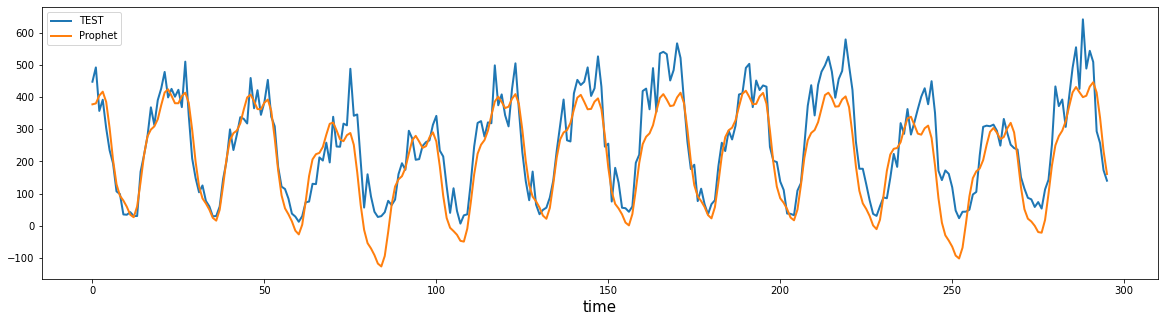

In [16]:
RollBack[['TEST', 'Prophet']].plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


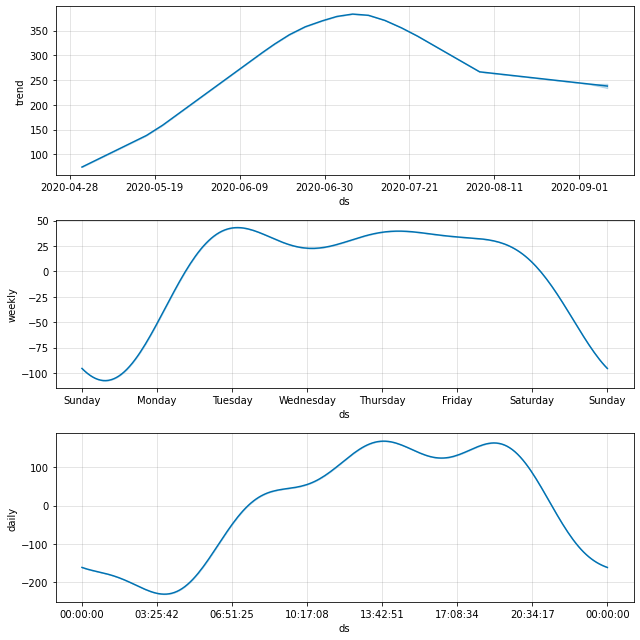

In [21]:
fig = m.plot_components(forecast)